**Nama : Widiawati Sihaloho**

**NIM : 24060122120037**

**Praktikum ML LAB C-1**

# **MODUL 5**

In [13]:
import pandas as pd
import numpy as np
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns

**1. Lakukan agglomerative clustering untuk dataset random yang tersedia di atas dengan single linkage dan average linkage! Jelaskan perbedaannya!**


*Generate Random Data*

In [14]:
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2,-1], [1,1], [10,4]], cluster_std=0.9)


*Plotting Random Data*

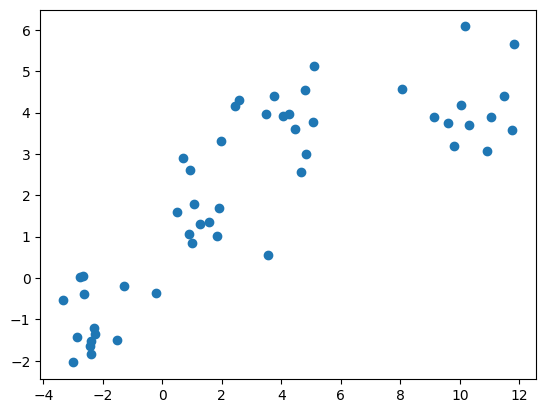

In [15]:
plt.scatter(X1[:,0], X1[:,1], marker='o')

*Agglomerative Clustering*

In [16]:
# Single Linkage
agglom_single = AgglomerativeClustering(n_clusters = 4, linkage = 'single')
y_single = agglom_single.fit_predict(X1)

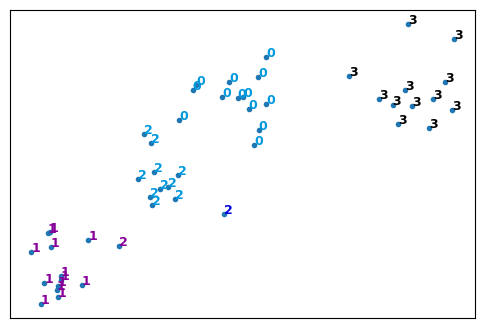

In [17]:
plt.figure(figsize=(6, 4))

x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)
X1 = (X1 - x_min) / (x_max - x_min)

for i in range(X1.shape[0]):
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom_single.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})

plt.xticks([])
plt.yticks([])
#plt.axis('off')
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
plt.show()

Penjelasan Single Linkage :     

Agglomerative Clustering dengan metode single linkage untuk membagi data X1 menjadi 4 kluster. Algoritma ini menentukan jarak antar kluster berdasarkan jarak terdekat antara dua titik dari kluster yang berbeda. Dengan memanggil fungsi fit_predict(X1), model menghitung hierarki pengelompokan dan memberikan label kluster untuk setiap titik data, yang disimpan dalam variabel y_single. Metode ini cocok untuk mendeteksi kluster berbentuk rantai atau yang memiliki jarak antar kluster yang dekat.


In [18]:
# Average Linkage
agglom_average = AgglomerativeClustering(n_clusters = 4, linkage = 'average')
y_average = agglom_average.fit_predict(X1)

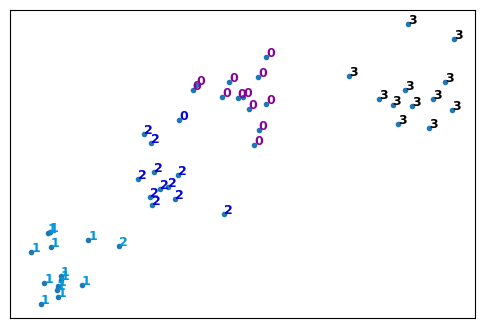

In [19]:
plt.figure(figsize=(6, 4))

x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)
X1 = (X1 - x_min) / (x_max - x_min)

for i in range(X1.shape[0]):
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom_average.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})

plt.xticks([])
plt.yticks([])
#plt.axis('off')
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
plt.show()

Penjelasan Average Linkage:

Agglomerative Clustering dengan metode average linkage untuk membagi data X1 menjadi 4 kluster. Metode average linkage menghitung jarak antar kluster berdasarkan rata-rata jarak semua pasangan titik antara dua kluster. Fungsi fit_predict(X1) digunakan untuk menyesuaikan model dengan data dan menghasilkan label kluster, yang disimpan dalam variabel y_average. Hasil ini membagi data ke dalam empat kelompok, dengan kluster yang cenderung lebih stabil dan kompak dibandingkan metode single linkage.

*Plotting Dendogram*

In [20]:
from math import dist
dist_matrix = distance_matrix(X1,X1)
print(dist_matrix)

[[0.         0.07724173 0.3505717  ... 0.2955818  0.35694357 0.34990608]
 [0.07724173 0.         0.31975276 ... 0.33422249 0.37139425 0.34057184]
 [0.3505717  0.31975276 0.         ... 0.64535297 0.69113761 0.65235969]
 ...
 [0.2955818  0.33422249 0.64535297 ... 0.         0.12343826 0.21117377]
 [0.35694357 0.37139425 0.69113761 ... 0.12343826 0.         0.110892  ]
 [0.34990608 0.34057184 0.65235969 ... 0.21117377 0.110892   0.        ]]


In [21]:
X = hierarchy.linkage(dist_matrix, 'single')
Y = hierarchy.linkage(dist_matrix, 'average')

<ipython-input-21-7e9a5415d43d>:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  X = hierarchy.linkage(dist_matrix, 'single')
<ipython-input-21-7e9a5415d43d>:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = hierarchy.linkage(dist_matrix, 'average')


*Dendogram untuk Parameter X (Single)*

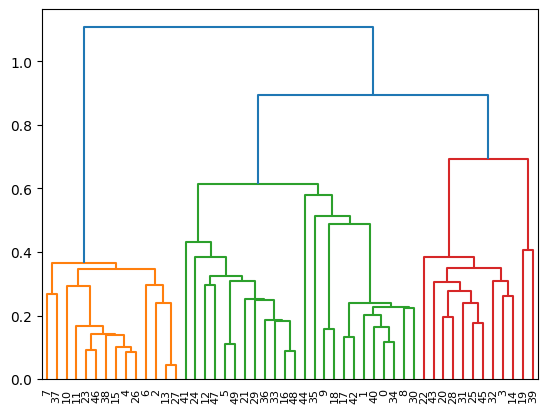

In [22]:
dendro = hierarchy.dendrogram(X)

*Dendogram untuk Parameter Y (Average)*

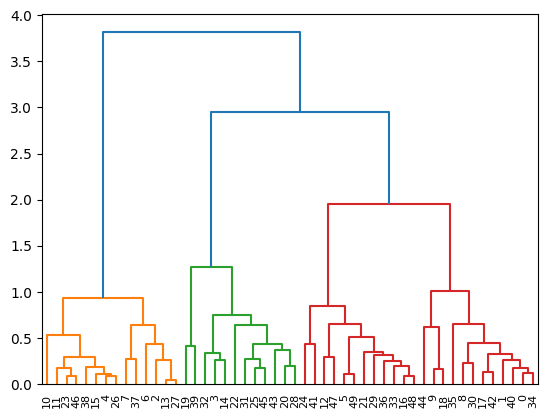

In [23]:
dendro = hierarchy.dendrogram(Y)

**Penjelasan Perbedaan antara Single Linkage dan Average Linkage:**

Dari gambar yang ditampilkan, perbedaan antara dendrogram untuk *single linkage* dan *average linkage* terlihat jelas. Pada ***single linkage***, kluster cenderung digabungkan lebih cepat dengan jarak yang sangat kecil, menghasilkan pengelompokan yang lebih memanjang dan sensitif terhadap titik terdekat. Hal ini menyebabkan beberapa kluster terlihat terlalu menyatu pada jarak rendah.
Sebaliknya, pada ***average linkage***, penggabungan kluster lebih bertahap dan teratur, menghasilkan kluster yang lebih kompak dan terpisah jelas dengan jarak yang lebih besar. Metode average linkage lebih tahan terhadap *outlier* dan memberikan pengelompokan yang lebih stabil dan terstruktur dibandingkan single linkage, yang sering kali menggabungkan data yang tidak relevan.

**2. Lakukan agglomerative clustering menggunakan scipy dan scikit-learn dengan single linkage dan average linkage untuk dataset cars_clustering! Jelaskan perbedaannya!**


*Read Data*

In [24]:
filename = 'cars_clus.csv'

pdf = pd.read_csv(filename)
print ("Shape of dataset: ", pdf.shape)

pdf.head(5)

Shape of dataset:  (159, 16)


manufact    model   sales  resale type   price engine_s horsepow wheelbas  \
0    Acura  Integra  16.919   16.36    0    21.5      1.8      140    101.2   
1    Acura       TL  39.384  19.875    0    28.4      3.2      225    108.1   
2    Acura       CL  14.114  18.225    0  $null$      3.2      225    106.9   
3    Acura       RL   8.588  29.725    0      42      3.5      210    114.6   
4     Audi       A4  20.397  22.255    0   23.99      1.8      150    102.6   

  width length curb_wgt fuel_cap mpg lnsales  partition  
0  67.3  172.4    2.639     13.2  28   2.828          0  
1  70.3  192.9    3.517     17.2  25   3.673          0  
2  70.6    192     3.47     17.2  26   2.647          0  
3  71.4  196.6     3.85       18  22    2.15          0  
4  68.2    178    2.998     16.4  27   3.015          0

*Data Cleaning*

In [25]:
print("Shape of dataset before cleaning: ", pdf.size)
pdf[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
      'mpg', 'lnsales']] = pdf[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
      'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
pdf = pdf.dropna()
pdf = pdf.reset_index(drop=True)
print("Shape of dataset after cleaning: ", pdf.size)
pdf.head(5)

Shape of dataset before cleaning:  2544
Shape of dataset after cleaning:  1872


manufact    model   sales  resale  type  price  engine_s  horsepow  \
0    Acura  Integra  16.919  16.360   0.0  21.50       1.8     140.0   
1    Acura       TL  39.384  19.875   0.0  28.40       3.2     225.0   
2    Acura       RL   8.588  29.725   0.0  42.00       3.5     210.0   
3     Audi       A4  20.397  22.255   0.0  23.99       1.8     150.0   
4     Audi       A6  18.780  23.555   0.0  33.95       2.8     200.0   

   wheelbas  width  length  curb_wgt  fuel_cap   mpg  lnsales  partition  
0     101.2   67.3   172.4     2.639      13.2  28.0    2.828          0  
1     108.1   70.3   192.9     3.517      17.2  25.0    3.673          0  
2     114.6   71.4   196.6     3.850      18.0  22.0    2.150          0  
3     102.6   68.2   178.0     2.998      16.4  27.0    3.015          0  
4     108.7   76.1   192.0     3.561      18.5  22.0    2.933          0

*Pemilihan Fitur*

In [26]:
featureset = pdf[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

*Normalisasi*

In [27]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

x = featureset.values #returns a numpy array

min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(featureset)

feature_mtx[0:5]


array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

***Clustering With Scipy***






In [28]:
from operator import length_hint
import scipy.spatial
import numpy as np
leng = feature_mtx.shape[0]
D = np.zeros([leng,leng])
for i in range (leng):
  for j in range (leng):
    D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

*a. Single Linkage*

In [29]:
import pylab
import scipy.cluster.hierarchy
X = hierarchy.linkage(D, 'single')

from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(X, max_d, criterion='distance')
clusters

<ipython-input-29-0622e9cfe18e>:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  X = hierarchy.linkage(D, 'single')


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

*Menentukan Jumlah Cluster*

In [30]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(X, k, criterion='maxclust')
clusters


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       5, 2, 2, 2, 2, 2, 2, 2, 2, 4, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2], dtype=int32)

*Plotting Dendogram*

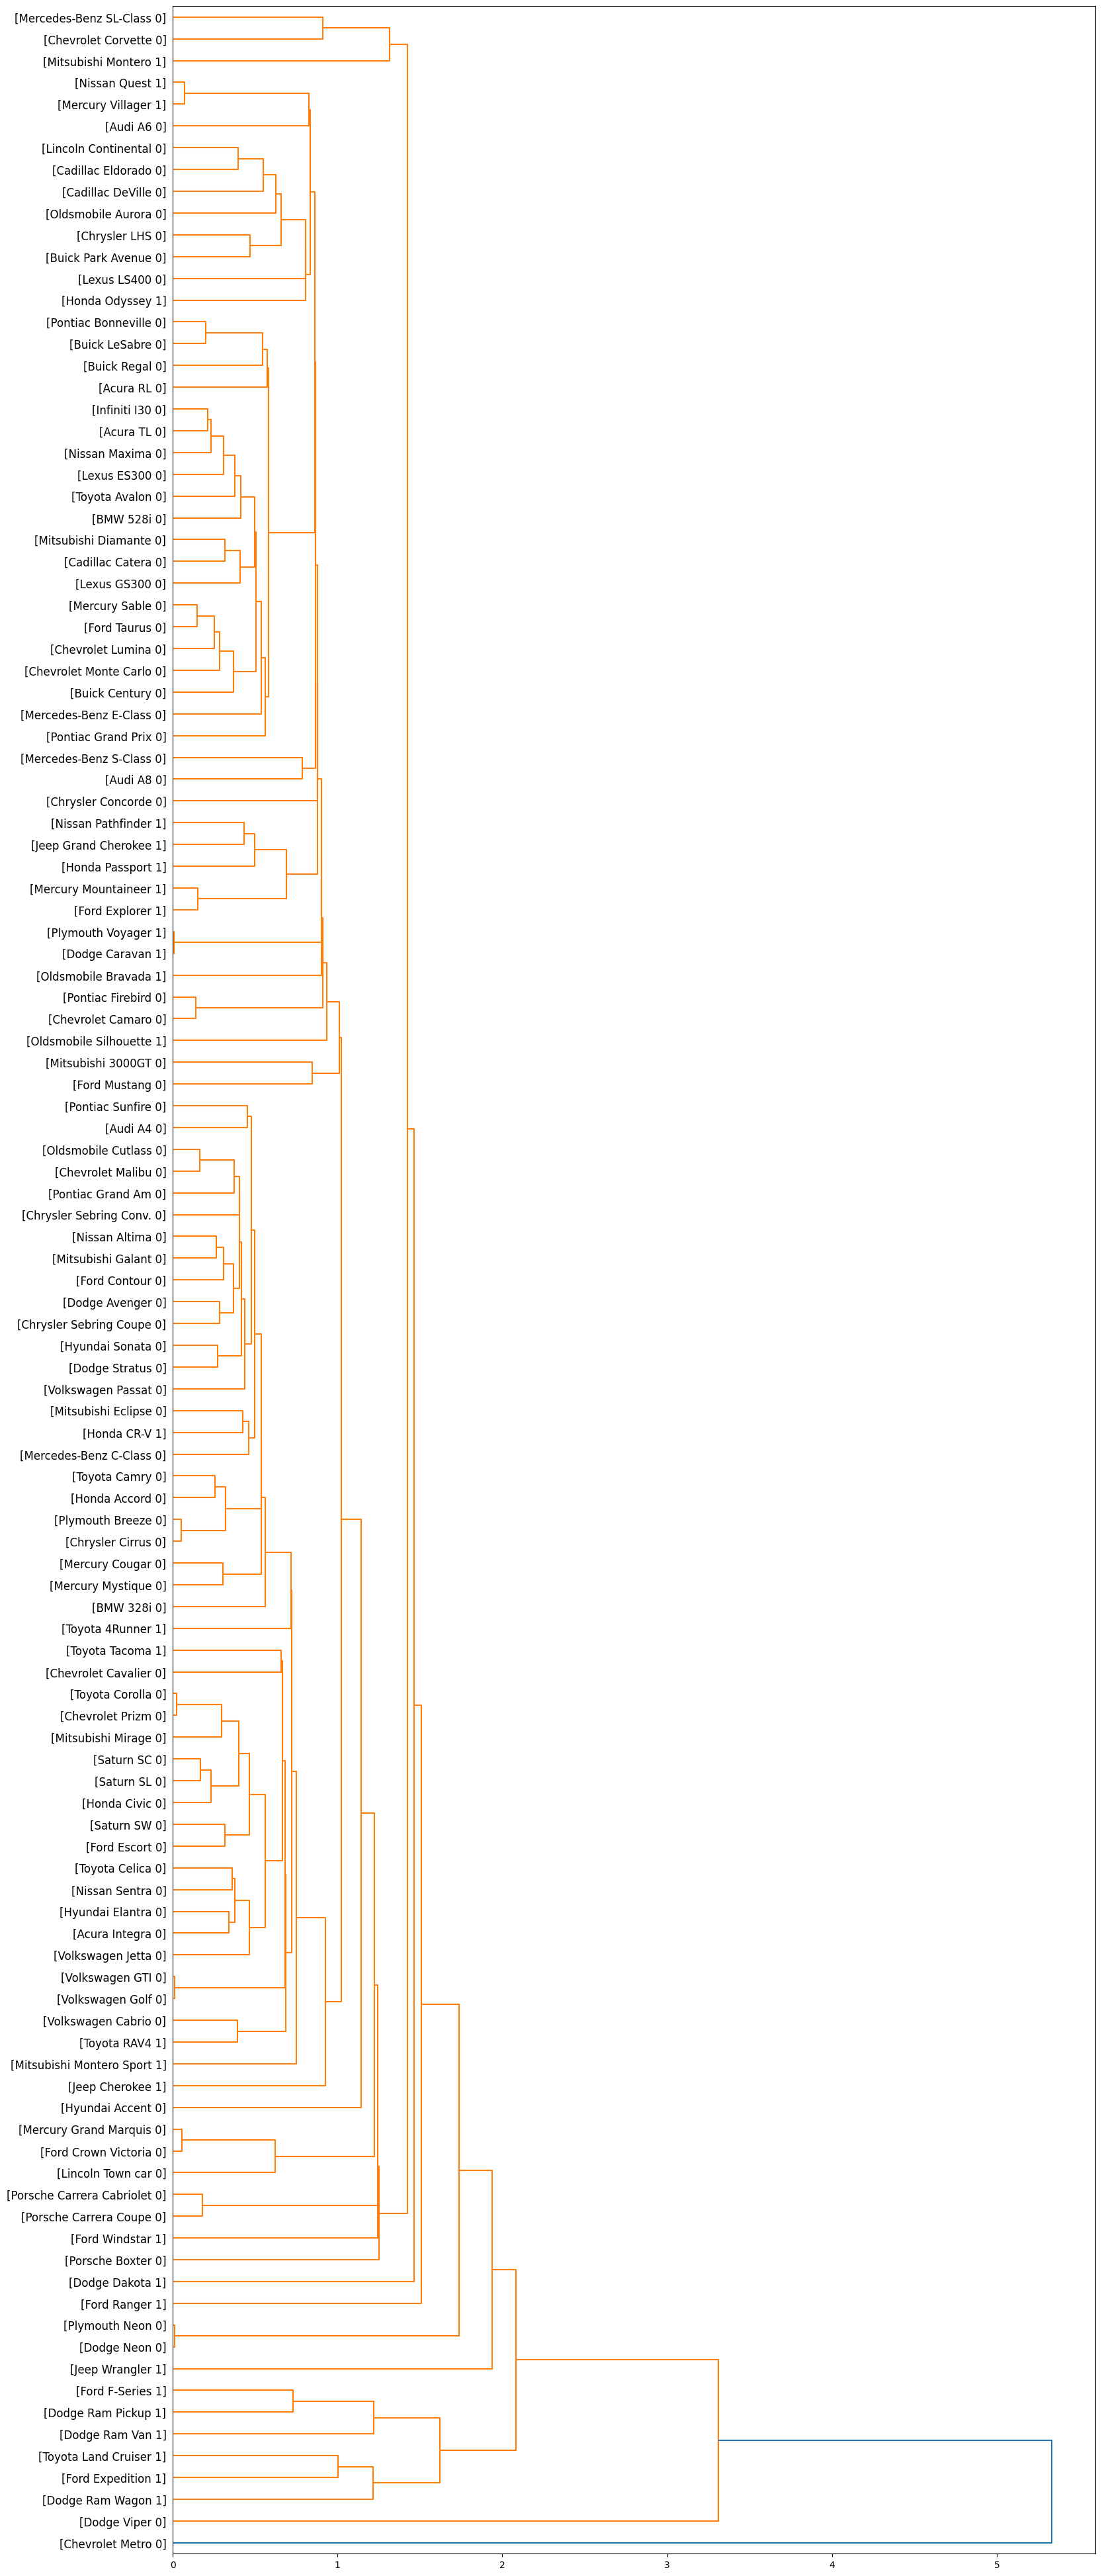

In [31]:
fig  = pylab.figure(figsize=(18,50))
def llf(id):
  return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])) )

dendro = hierarchy.dendrogram(X, leaf_label_func=llf, leaf_rotation=0, leaf_font_size=12, orientation='right')

Penjelasan Single Linkage:

Pada hasil clustering menggunakan *single linkage* dengan parameter maksimal jarak (max_d = 3), seluruh data cenderung dikelompokkan ke dalam satu kluster besar (kluster 1) dengan beberapa pengecualian kecil (kluster 2 dan 3). Hal ini menunjukkan bahwa single linkage cenderung sensitif terhadap titik data yang berdekatan, sehingga penggabungan lebih cepat terjadi meskipun data mungkin memiliki perbedaan signifikan. Sebagai hasilnya, mayoritas data berada dalam satu kluster dominan, yang dapat membuat metode ini kurang efektif untuk memisahkan kluster yang kompleks.

Sebaliknya, ketika jumlah kluster maksimum ditentukan (k = 5), data terbagi lebih seimbang ke dalam lima kluster (kluster 1 hingga 5). Metode ini memaksa pembagian berdasarkan jumlah kluster yang ditentukan, meskipun struktur alami dari data mungkin tidak mendukung pengelompokan ini. Perubahan hasil ini menunjukkan bahwa *single linkage* menghasilkan kluster yang sensitif terhadap parameter, seperti jarak maksimal atau jumlah kluster, dan sering kali tidak memberikan hasil yang optimal tanpa penyesuaian parameter yang cermat. Dalam kasus ini, pembagian kluster tampaknya lebih terstruktur ketika jumlah kluster ditentukan dibandingkan dengan batasan jarak.

*b. Average Linkage*

In [32]:
Y = hierarchy.linkage(D, 'average')

max_d = 3
clusters = fcluster(Y, max_d, criterion='distance')
clusters


<ipython-input-32-c8c2f0b95820>:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = hierarchy.linkage(D, 'average')


array([3, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 4, 3,
       6, 5, 5, 5, 5, 5, 3, 5, 5, 2, 1, 1, 1, 4, 5, 3, 5, 5, 5, 4, 5, 4,
       1, 5, 1, 3, 5, 5, 5, 4, 3, 3, 5, 5, 3, 5, 5, 5, 5, 4, 4, 4, 3, 5,
       5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 3, 5, 5, 5, 5, 5, 4,
       5, 4, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 5, 5, 3, 5, 3,
       5, 1, 3, 5, 5, 3, 3], dtype=int32)

*Menentukan Jumlah Cluster*

In [33]:
max_d = 3
clusters = fcluster(Y, max_d, criterion='distance')
clusters

array([3, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 4, 3,
       6, 5, 5, 5, 5, 5, 3, 5, 5, 2, 1, 1, 1, 4, 5, 3, 5, 5, 5, 4, 5, 4,
       1, 5, 1, 3, 5, 5, 5, 4, 3, 3, 5, 5, 3, 5, 5, 5, 5, 4, 4, 4, 3, 5,
       5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 3, 5, 5, 5, 5, 5, 4,
       5, 4, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 5, 5, 3, 5, 3,
       5, 1, 3, 5, 5, 3, 3], dtype=int32)

*Plotting Dendogram*

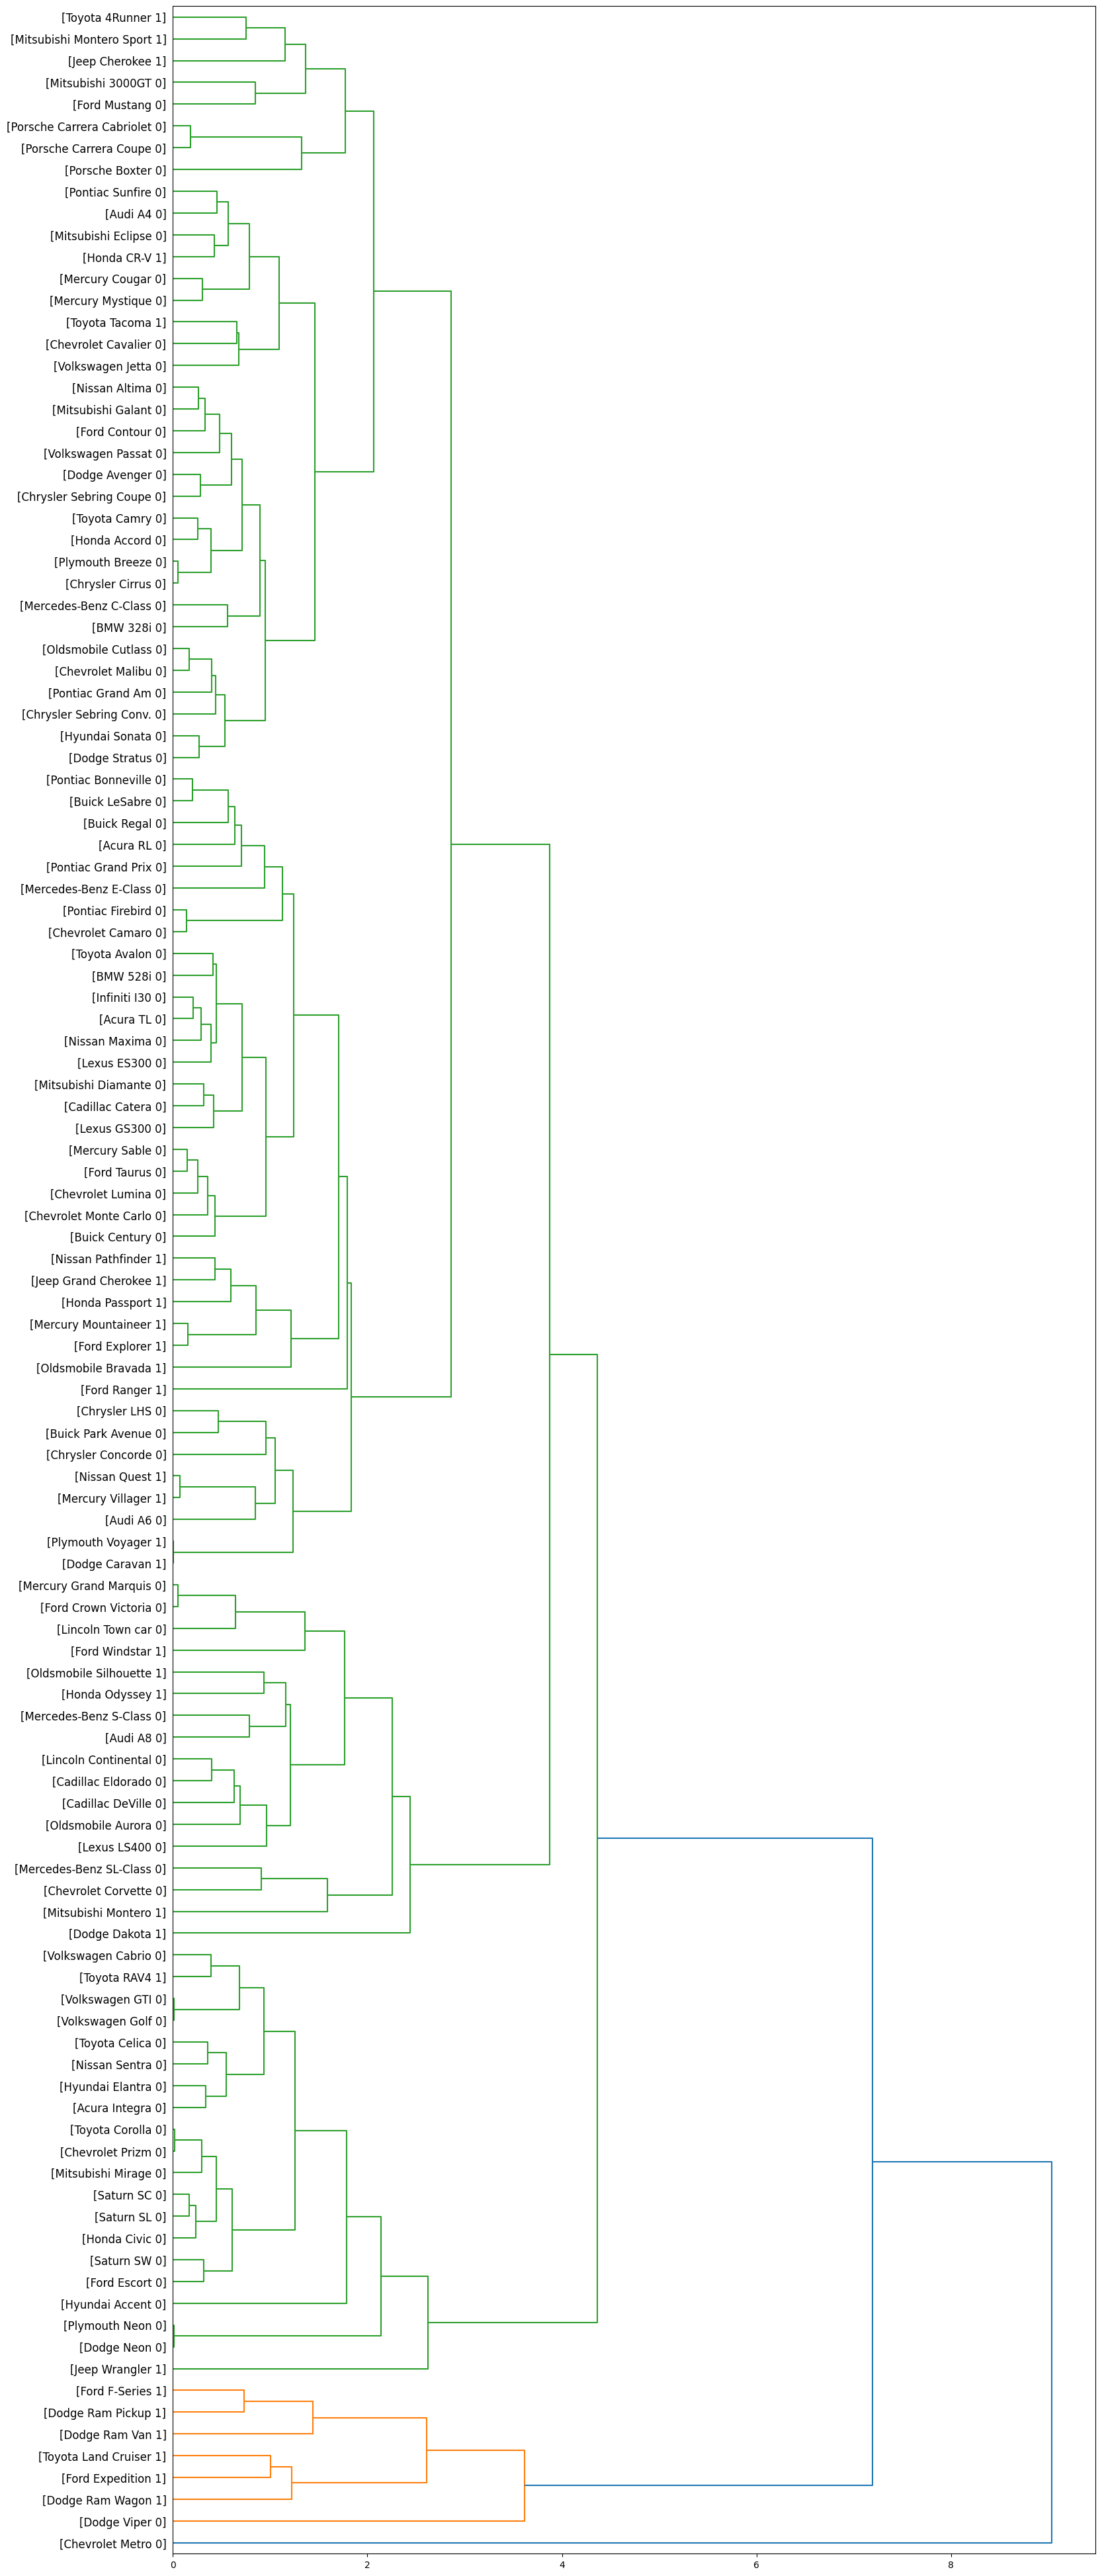

In [34]:
fig  = pylab.figure(figsize=(18,50))
def llf(id):
  return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])) )

dendro = hierarchy.dendrogram(Y, leaf_label_func=llf, leaf_rotation=0, leaf_font_size=12, orientation='right')

Penjelasan Average Linkage:

Pada hasil clustering menggunakan average linkage dengan parameter maksimal jarak (max_d = 3), data terbagi ke dalam beberapa kluster yang lebih bervariasi dibandingkan dengan metode single linkage. Dalam hal ini, data terdistribusi ke dalam kluster yang lebih heterogen, dengan kluster 5 menjadi yang dominan, sementara kluster lain seperti 1, 2, 3, 4, dan 6 juga terbentuk, meskipun lebih kecil ukurannya. Hal ini mencerminkan karakteristik average linkage, yang menghitung jarak antar kluster berdasarkan rata-rata jarak antara semua titik dalam kluster, sehingga memberikan pembagian yang lebih seimbang dan cenderung tidak terlalu terpengaruh oleh outlier atau pasangan titik yang sangat dekat.

Dibandingkan dengan single linkage, metode ini menghasilkan kluster yang lebih terstruktur dengan jarak antar kluster yang lebih jelas, sehingga lebih cocok untuk dataset dengan struktur yang kompleks. Namun, seperti halnya single linkage, hasilnya juga sensitif terhadap parameter maksimal jarak, yang memengaruhi jumlah dan distribusi kluster. Pendekatan ini menghasilkan kluster yang lebih representatif dalam mengelompokkan data dengan pola yang lebih kompleks.

***Clustering with Scikit-Learn***

*a. Single Linkage*

In [35]:
agglom_single = AgglomerativeClustering(n_clusters = 6, linkage = 'single')
agglom_single.fit(feature_mtx)
agglom_single.labels_


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 5, 1, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0])

In [36]:
pdf['cluster_'] = agglom_single.labels_
pdf.head()

manufact    model   sales  resale  type  price  engine_s  horsepow  \
0    Acura  Integra  16.919  16.360   0.0  21.50       1.8     140.0   
1    Acura       TL  39.384  19.875   0.0  28.40       3.2     225.0   
2    Acura       RL   8.588  29.725   0.0  42.00       3.5     210.0   
3     Audi       A4  20.397  22.255   0.0  23.99       1.8     150.0   
4     Audi       A6  18.780  23.555   0.0  33.95       2.8     200.0   

   wheelbas  width  length  curb_wgt  fuel_cap   mpg  lnsales  partition  \
0     101.2   67.3   172.4     2.639      13.2  28.0    2.828          0   
1     108.1   70.3   192.9     3.517      17.2  25.0    3.673          0   
2     114.6   71.4   196.6     3.850      18.0  22.0    2.150          0   
3     102.6   68.2   178.0     2.998      16.4  27.0    3.015          0   
4     108.7   76.1   192.0     3.561      18.5  22.0    2.933          0   

   cluster_  
0         0  
1         0  
2         0  
3         0  
4         0

<ipython-input-37-b957593e634a>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label), alpha=0.5)


Text(0, 0.5, 'mpg')

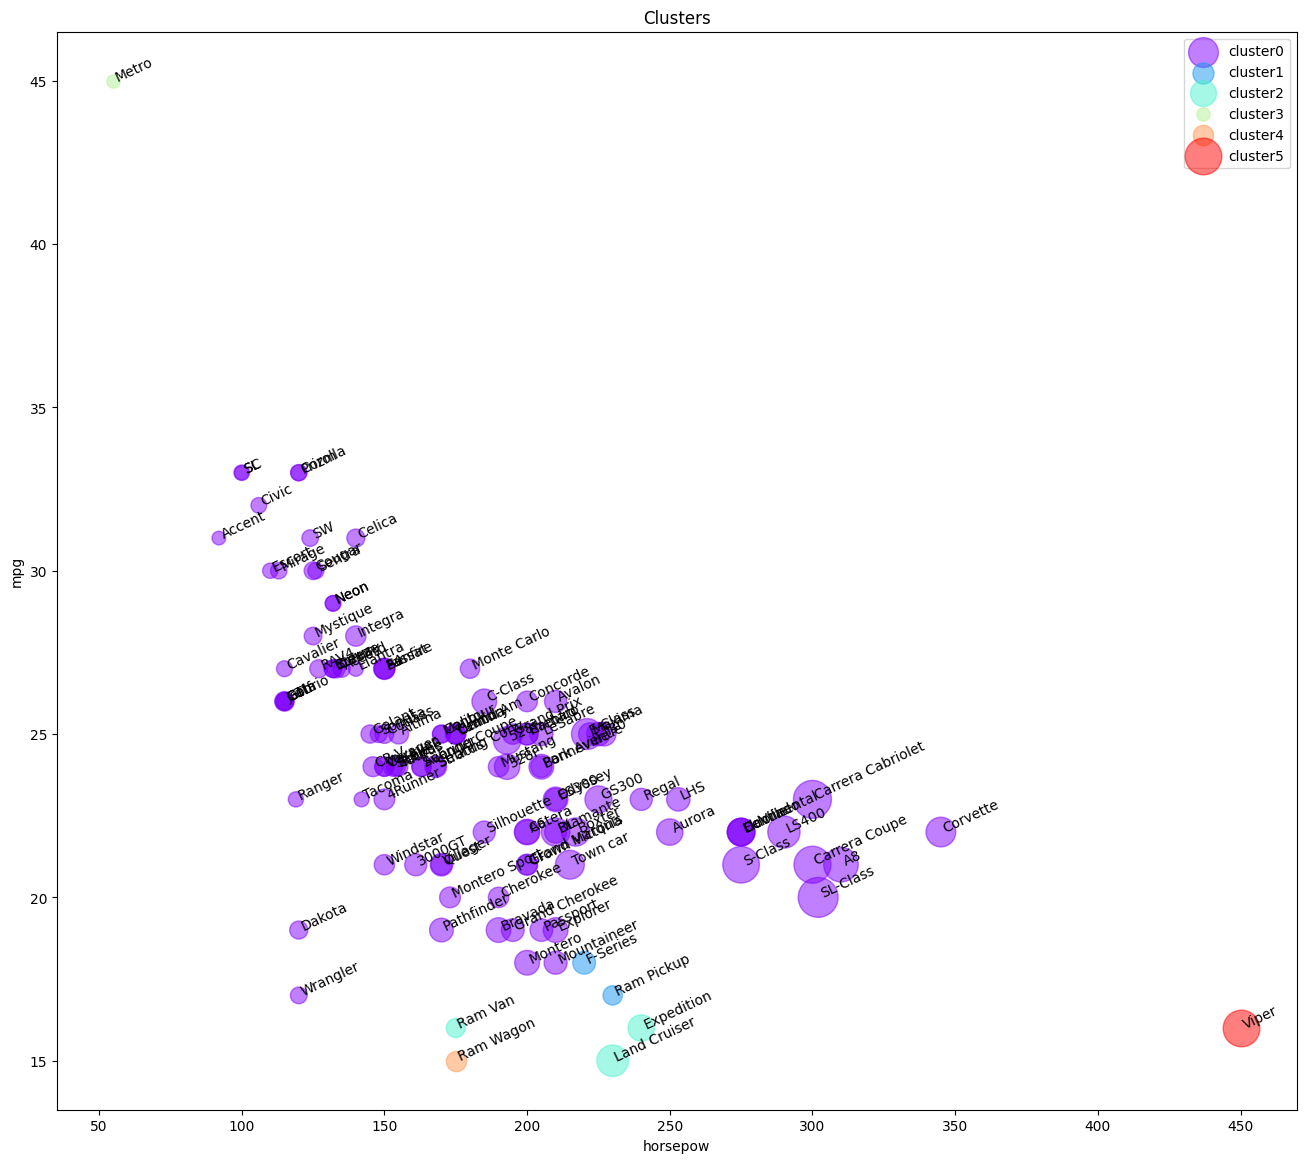

In [37]:
import matplotlib.cm as cm
n_clusters = max(agglom_single.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
  subset = pdf[pdf.cluster_ == label]
  for i in subset.index:
    plt.text(subset.horsepow[i], subset.mpg[i], str(subset['model'][i]), rotation=25)
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label), alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')


*Menghitung jumlah kasus di setiap kelompok*

In [38]:
pdf.groupby(['cluster_','type'])['cluster_'].count()

cluster_  type
0         0.0     86
          1.0     23
1         1.0      2
2         1.0      3
3         0.0      1
4         1.0      1
5         0.0      1
Name: cluster_, dtype: int64

*Melihat masing-masing cluster*

In [39]:
agg_cars = pdf.groupby(['cluster_','type'])[['horsepow', 'engine_s', 'mpg', 'price']].mean()
agg_cars


horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   181.197674  2.902326  25.358140  26.286779
         1.0   167.478261  3.095652  21.000000  22.811261
1        1.0   225.000000  4.900000  17.500000  23.197500
2        1.0   215.000000  4.400000  15.666667  35.479333
3        0.0    55.000000  1.000000  45.000000   9.235000
4        1.0   175.000000  3.900000  15.000000  21.315000
5        0.0   450.000000  8.000000  16.000000  69.725000

*Plotting Dendogram*

<ipython-input-40-4b73915e4655>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
<ipython-input-40-4b73915e4655>:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))


Text(0, 0.5, 'mpg')

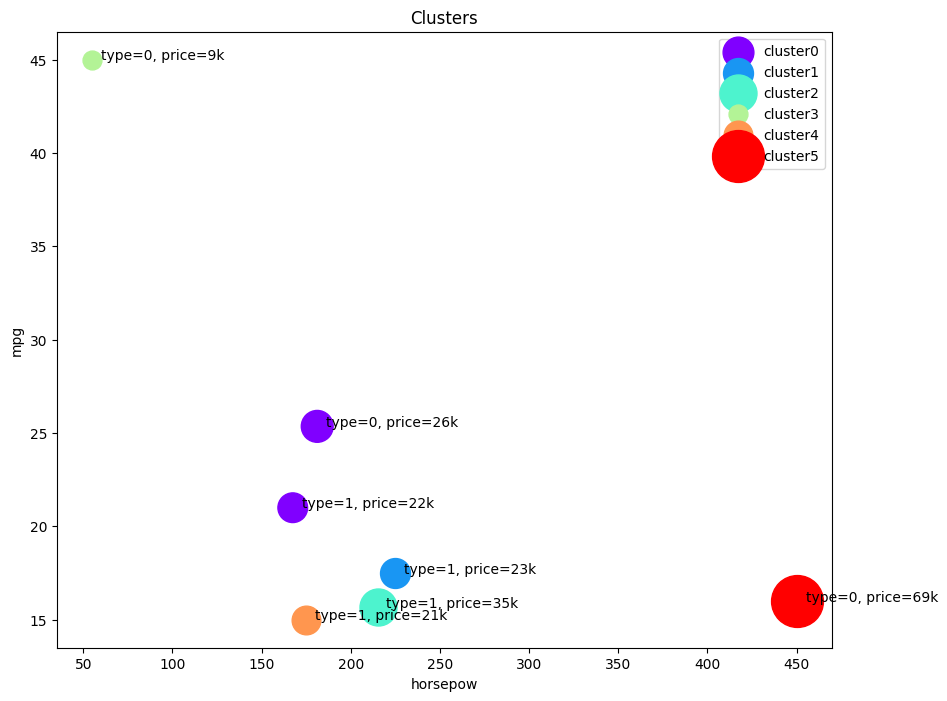

In [40]:
plt.figure(figsize=(10, 8))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')


**Penjelasan Single Lingkage:**

Hasil clustering menggunakan metode *single linkage* membagi data ke dalam 6 kluster, namun distribusinya sangat tidak merata. Mayoritas data terkonsentrasi di kluster 0, yang terdiri dari 86 mobil dengan spesifikasi sedang, seperti tenaga kuda rata-rata 181, kapasitas mesin 2.9, efisiensi bahan bakar 25.4 mpg, dan harga rata-rata 26,287 . Kluster lainnya memiliki jumlah data yang jauh lebih sedikit dan merepresentasikan mobil dengan karakteristik spesifik. Misalnya, kluster 5 hanya terdiri dari satu mobil dengan tenaga kuda sangat tinggi (450), kapasitas mesin besar (8.0), dan harga yang sangat mahal ($69,725). Kluster 2 dan 4 berisi mobil dengan kapasitas mesin dan tenaga kuda lebih besar, namun efisiensi bahan bakarnya rendah. Metode *single linkage* ini cenderung menghasilkan kluster yang tidak seimbang karena hanya mempertimbangkan jarak terdekat antar data, sehingga data dengan variasi besar sering kali menjadi kluster tersendiri.


*b. Average Linkage*

In [41]:
agglom_average = AgglomerativeClustering(n_clusters = 6, linkage = 'average')
agglom_average.fit(feature_mtx)
agglom_average.labels_

array([0, 4, 4, 0, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 1, 0,
       3, 0, 0, 4, 0, 4, 0, 0, 0, 1, 5, 2, 2, 4, 4, 0, 4, 0, 4, 4, 4, 4,
       2, 4, 5, 0, 0, 0, 4, 4, 0, 0, 0, 4, 0, 0, 4, 4, 4, 4, 4, 4, 0, 0,
       0, 4, 0, 4, 0, 0, 0, 4, 4, 4, 4, 0, 4, 4, 1, 0, 0, 4, 4, 4, 0, 4,
       4, 4, 0, 0, 4, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0])

In [42]:
pdf['cluster_'] = agglom_average.labels_
pdf.head()

manufact    model   sales  resale  type  price  engine_s  horsepow  \
0    Acura  Integra  16.919  16.360   0.0  21.50       1.8     140.0   
1    Acura       TL  39.384  19.875   0.0  28.40       3.2     225.0   
2    Acura       RL   8.588  29.725   0.0  42.00       3.5     210.0   
3     Audi       A4  20.397  22.255   0.0  23.99       1.8     150.0   
4     Audi       A6  18.780  23.555   0.0  33.95       2.8     200.0   

   wheelbas  width  length  curb_wgt  fuel_cap   mpg  lnsales  partition  \
0     101.2   67.3   172.4     2.639      13.2  28.0    2.828          0   
1     108.1   70.3   192.9     3.517      17.2  25.0    3.673          0   
2     114.6   71.4   196.6     3.850      18.0  22.0    2.150          0   
3     102.6   68.2   178.0     2.998      16.4  27.0    3.015          0   
4     108.7   76.1   192.0     3.561      18.5  22.0    2.933          0   

   cluster_  
0         0  
1         4  
2         4  
3         0  
4         4

<ipython-input-43-0b62702dfa7c>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label), alpha=0.5)


Text(0, 0.5, 'mpg')

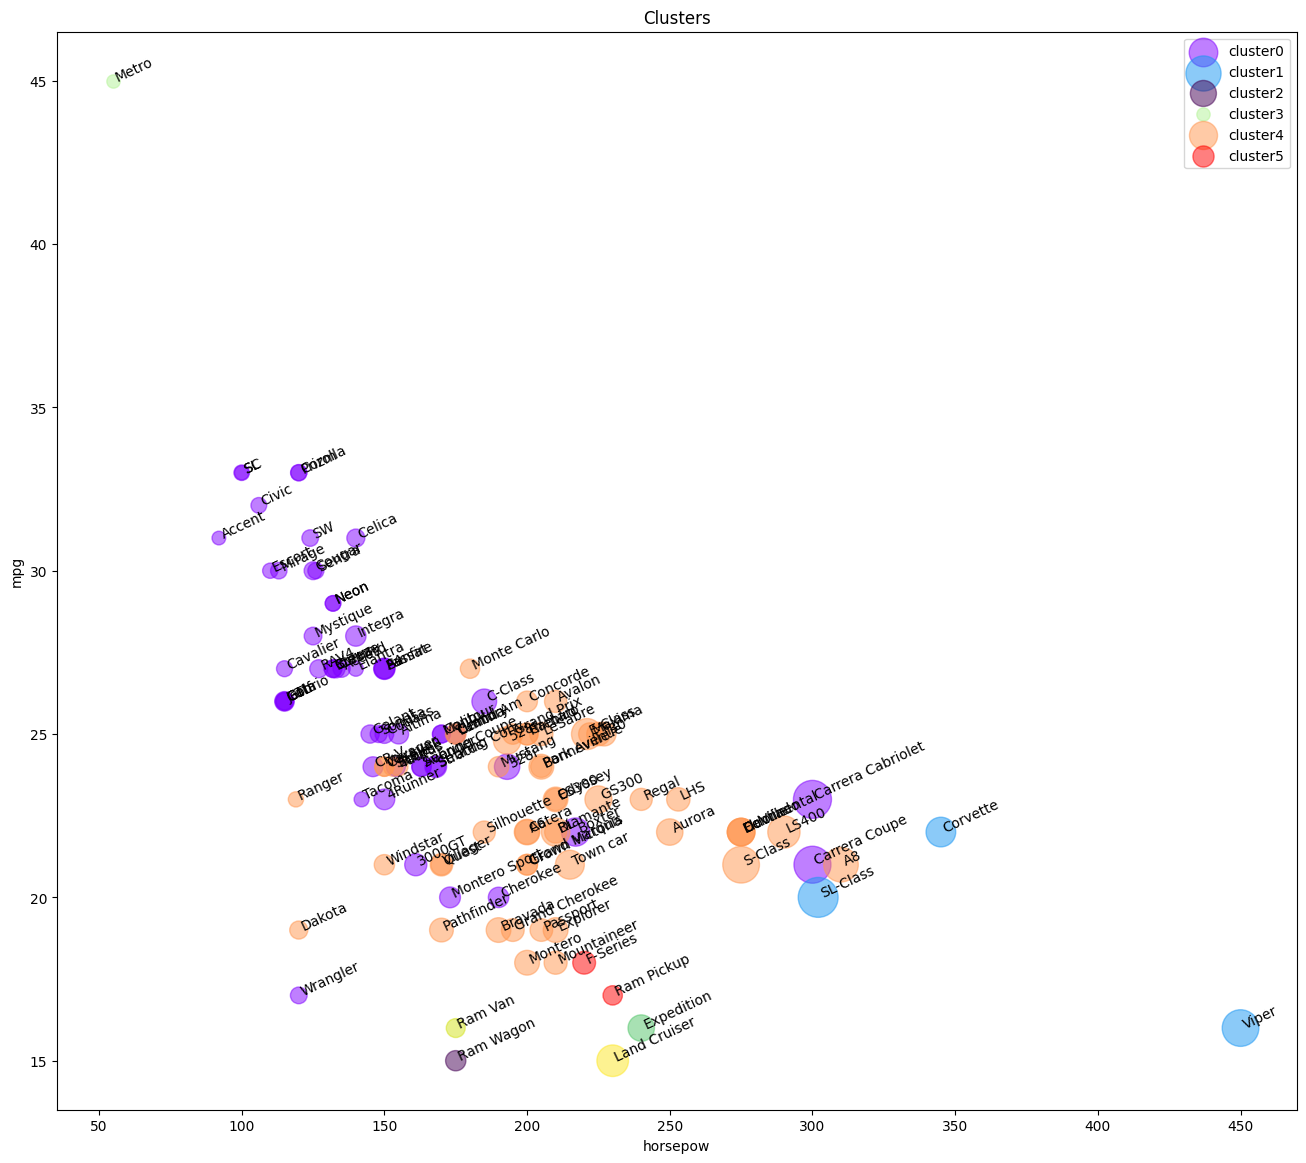

In [43]:
import matplotlib.cm as cm
n_clusters = max(agglom_average.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
  subset = pdf[pdf.cluster_ == label]
  for i in subset.index:
    plt.text(subset.horsepow[i], subset.mpg[i], str(subset['model'][i]), rotation=25)
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label), alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')


*Menghitung jumlah kasus di setiap kelompok*

In [44]:
pdf.groupby(['cluster_','type'])['cluster_'].count()

cluster_  type
0         0.0     47
          1.0      7
1         0.0      3
2         1.0      4
3         0.0      1
4         0.0     37
          1.0     16
5         1.0      2
Name: cluster_, dtype: int64

*Melihat masing-masing cluster*

In [45]:
agg_cars = pdf.groupby(['cluster_','type'])[['horsepow', 'engine_s', 'mpg', 'price']].mean()
agg_cars


horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   146.531915  2.246809  27.021277  20.306128
         1.0   149.714286  2.657143  22.000000  18.551571
1        0.0   365.666667  6.233333  19.333333  66.010000
2        1.0   205.000000  4.275000  15.500000  31.938250
3        0.0    55.000000  1.000000  45.000000   9.235000
4        0.0   217.540541  3.602703  23.481081  31.837027
         1.0   175.250000  3.287500  20.562500  24.674875
5        1.0   225.000000  4.900000  17.500000  23.197500

*Plotting Dendogram*

<ipython-input-46-4b73915e4655>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
<ipython-input-46-4b73915e4655>:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))


Text(0, 0.5, 'mpg')

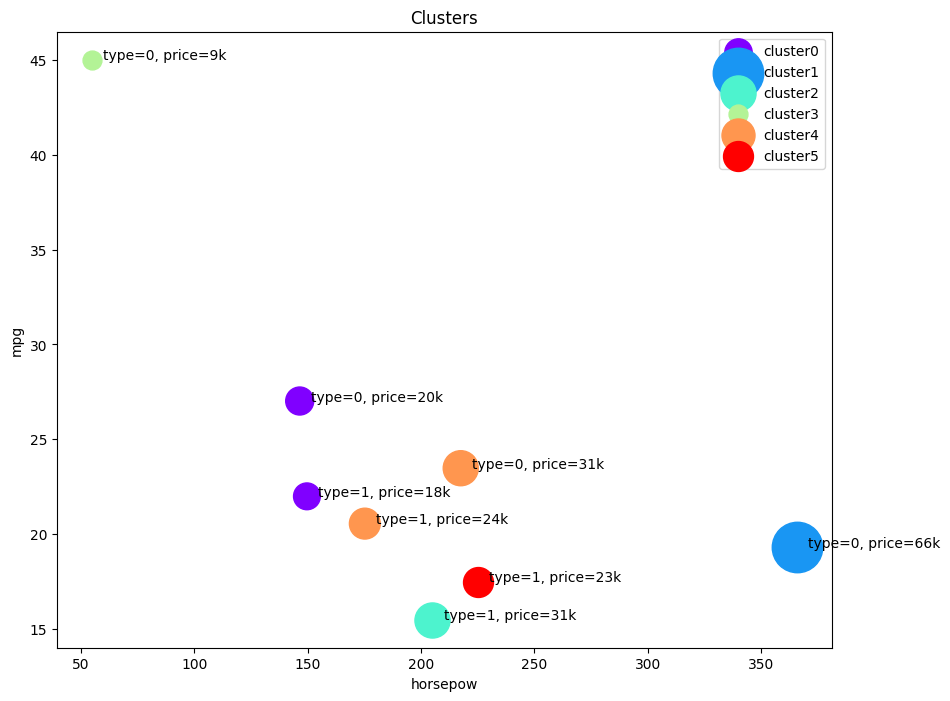

In [46]:
plt.figure(figsize=(10, 8))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')


**Penjelasan Average Linkage:**

Clustering menggunakan metode *average linkage* dengan jumlah kluster 6 menghasilkan distribusi yang lebih seimbang dibandingkan dengan metode *single linkage*. Kluster 0 merupakan kluster terbesar dengan 47 mobil tipe 0 (bertenaga kuda rata-rata 146.5, kapasitas mesin 2.2, efisiensi bahan bakar 27 mpg, dan harga rata-rata 20,306). Kluster 4 juga cukup besar dengan 37 mobil tipe 0 (bertenaga kuda lebih tinggi, rata-rata 217.5, kapasitas mesin 3.6, dan harga rata-rata $31,837) serta 16 mobil tipe 1 dengan spesifikasi sedikit lebih rendah.

Kluster-kluster kecil seperti kluster 1 dan 5 terdiri dari mobil dengan kapasitas mesin dan tenaga kuda tinggi, tetapi harga relatif mahal (misalnya kluster 1 memiliki rata-rata harga 66,010 dengan tenaga kuda 365.7). Sementara itu, kluster 3 hanya berisi satu mobil dengan tenaga kuda rendah (55), kapasitas mesin kecil (1.0), efisiensi bahan bakar sangat tinggi (45 mpg), dan harga yang murah ($9,235).

Metode *average linkage* lebih mampu mengelompokkan mobil dengan karakteristik serupa ke dalam kluster yang lebih relevan dan memperhatikan rata-rata jarak antar titik. Hal ini menghasilkan kluster yang lebih representatif terhadap variasi dalam data, dibandingkan metode *single linkage* yang cenderung mendominasi satu kluster dengan mayoritas data.

***Perbedaan Clustering with Scipy dan Scikit-Learn***

Perbedaan utama antara clustering menggunakan **Scipy** dan **Scikit-learn** pada dataset ini terletak pada metode, hasil kluster, dan parameter kontrol yang digunakan. **Scipy** menggunakan fungsi `linkage` untuk menghitung hierarki pengelompokan dan `fcluster` untuk membentuk kluster, dengan memberikan kontrol lebih pada kriteria pembentukan kluster, seperti jarak antar poin atau jumlah kluster maksimum yang diinginkan. Metode ini cocok untuk analisis eksplorasi karena memungkinkan penggunaan dendrogram untuk visualisasi dan pemahaman mendalam tentang hubungan hierarki antar data.

Di sisi lain, **Scikit-learn** menggunakan algoritma `AgglomerativeClustering`, yang lebih langsung dengan parameter utama berupa jumlah kluster yang diinginkan, dan tidak memerlukan dendrogram. Dengan menggunakan metode *average linkage*, Scikit-learn menghasilkan kluster yang lebih terstruktur dan mudah diinterpretasikan, cocok untuk aplikasi praktis dalam pipeline pembelajaran mesin. Pada dataset ini, **Scipy** menghasilkan kluster dengan distribusi yang tidak seimbang, terutama ketika menggunakan kriteria *distance*, sementara **Scikit-learn** memberikan pembagian kluster yang lebih jelas dan seimbang. Secara keseluruhan, **Scipy** lebih cocok untuk analisis mendalam dan eksplorasi, sedangkan **Scikit-learn** lebih efisien dan terintegrasi untuk aplikasi langsung dalam machine learning.

**3. Lakukan agglomerative clustering menggunakan scipy dan scikit-learn dengan single linkage, average linkage, dan complete linkage untuk dataset iris! Jelaskan perbedaannya!**

Read Data

In [47]:
filename = 'iris.csv'

pdf = pd.read_csv(filename)
print ("Shape of dataset: ", pdf.shape)

pdf.head(5)

Shape of dataset:  (150, 5)


sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [48]:
print("Shape of dataset before cleaning: ", pdf.size)

pdf = pdf.dropna()
pdf = pdf.reset_index(drop=True)
print("Shape of dataset after cleaning: ", pdf.size)
pdf.head(5)

Shape of dataset before cleaning:  750
Shape of dataset after cleaning:  750


sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [49]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
pdf[features] = scaler.fit_transform(pdf[features])


***Clustering With Scipy***

In [50]:
from operator import length_hint
import scipy.spatial
import numpy as np
leng = feature_mtx.shape[0]
D = np.zeros([leng,leng])
for i in range (leng):
  for j in range (leng):
    D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

*a. Single Linkage*

In [51]:
import pylab
import scipy.cluster.hierarchy
X = hierarchy.linkage(D, 'single')

from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(X, max_d, criterion='distance')
clusters

<ipython-input-51-0622e9cfe18e>:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  X = hierarchy.linkage(D, 'single')


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

*Menentukan Jumlah Cluster*

In [52]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(X, k, criterion='maxclust')
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       5, 2, 2, 2, 2, 2, 2, 2, 2, 4, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2], dtype=int32)

*Plotting Dendogram*

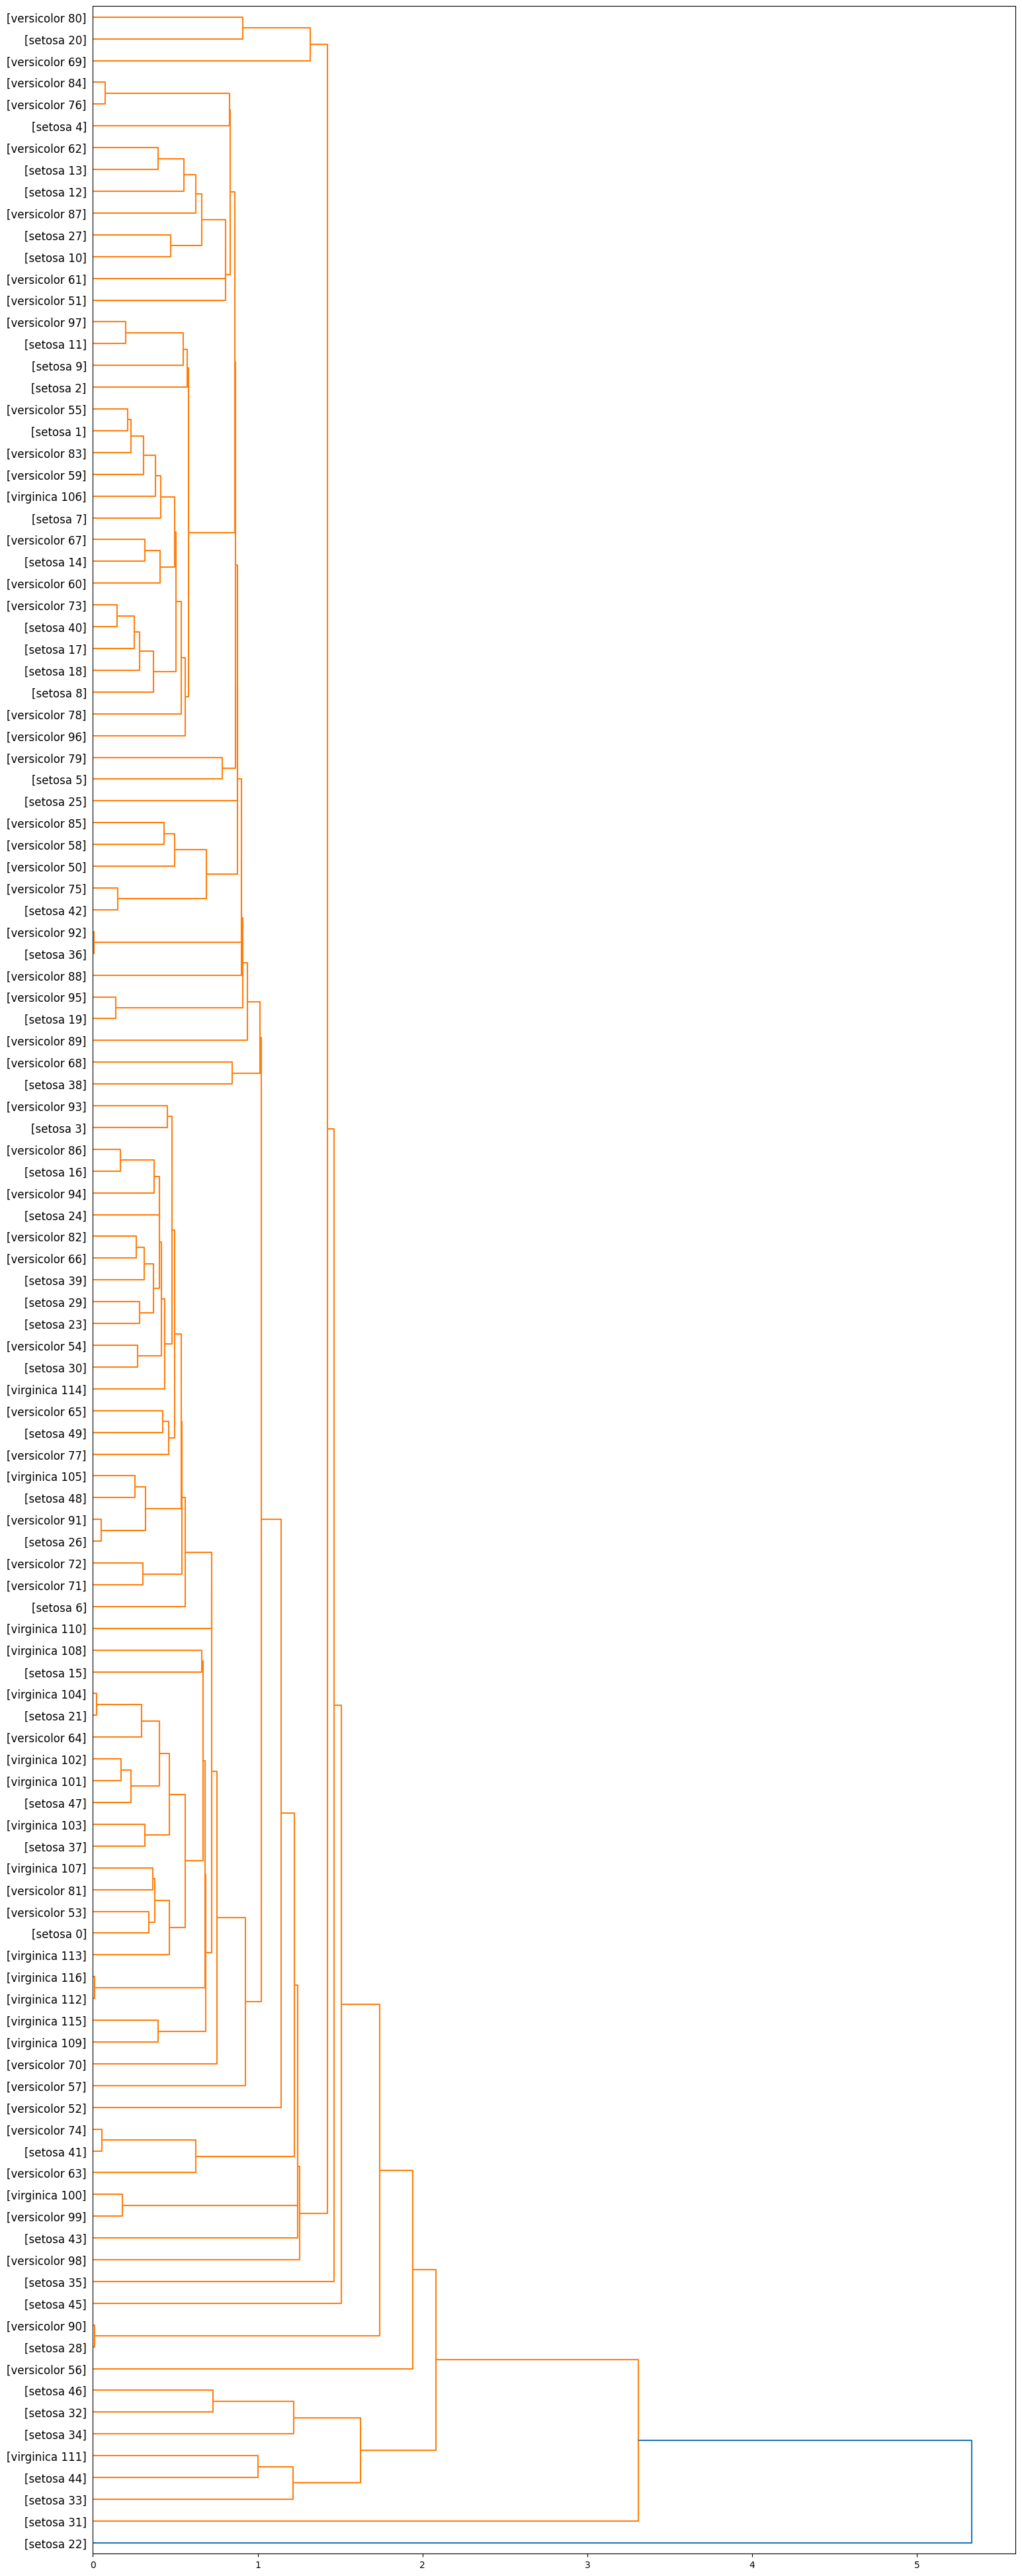

In [53]:
fig = plt.figure(figsize=(18,50))
def llf(id):
    return '[%s %s]' % (pdf['species'][id], id)  # Label: species dan indeks

dendro = hierarchy.dendrogram(X, leaf_label_func=llf, leaf_rotation=0, leaf_font_size=12, orientation='right')
plt.show()

*b. Complete Linkage*

In [54]:
import pylab
import scipy.cluster.hierarchy
Y = hierarchy.linkage(D, 'complete')

from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Y, max_d, criterion='distance')
clusters

<ipython-input-54-dd7ffabdd259>:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = hierarchy.linkage(D, 'complete')


array([ 1,  5,  5,  6,  5,  4,  6,  5,  5,  5,  5,  5,  4,  4,  5,  1,  6,
        5,  5,  5,  4,  2, 11,  6,  6,  5,  6,  5,  1,  6,  6, 10,  9,  8,
        9,  3,  5,  1,  7,  6,  5,  3,  5,  3,  8,  7,  9,  2,  6,  6,  5,
        4,  2,  1,  6,  5,  2,  7,  5,  5,  5,  4,  4,  3,  2,  6,  6,  5,
        7,  4,  7,  6,  6,  5,  3,  5,  5,  6,  5,  4,  4,  1,  6,  5,  5,
        5,  6,  4,  5,  4,  1,  6,  5,  6,  6,  5,  5,  5,  7,  7,  7,  2,
        2,  1,  2,  6,  5,  1,  1,  1,  7,  8,  1,  1,  6,  1,  1],
      dtype=int32)

*Menentukan Jumlah Cluster*

In [55]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Y, k, criterion='maxclust')
clusters

array([1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 3, 3, 3, 3, 2, 1,
       5, 3, 3, 3, 3, 3, 1, 3, 3, 4, 4, 4, 4, 2, 3, 1, 3, 3, 3, 2, 3, 2,
       4, 3, 4, 1, 3, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 2, 2, 2, 1, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 1, 3, 3, 3, 3, 3, 2,
       3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1,
       3, 4, 1, 1, 3, 1, 1], dtype=int32)

*Plotting Dendogram*

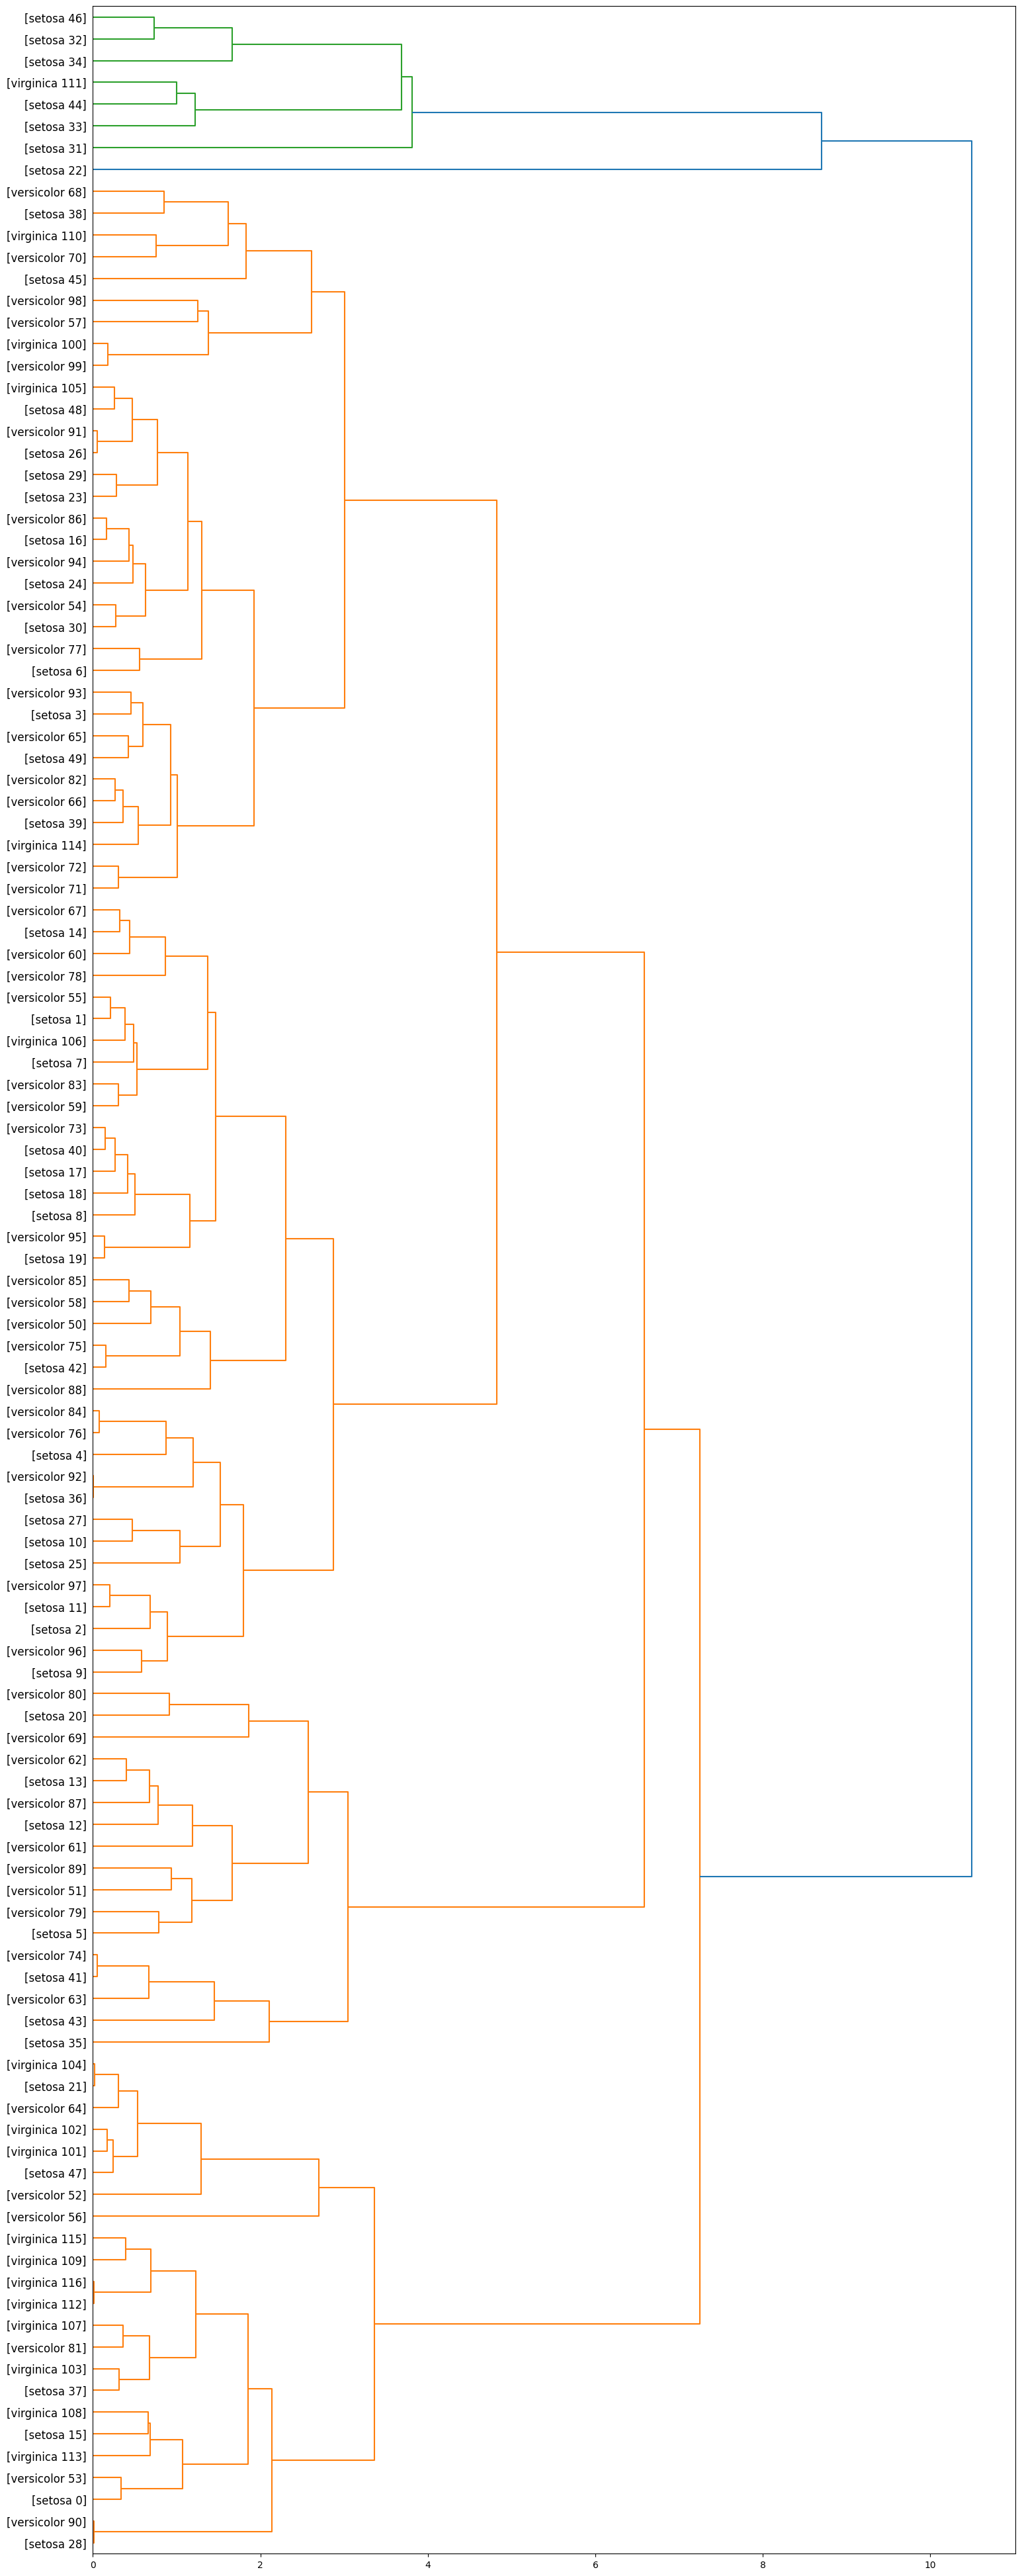

In [56]:
fig = plt.figure(figsize=(18, 50))
def llf(id):
    return '[%s %s]' % (pdf['species'][id], id)  # Label: species dan indeks

dendro = hierarchy.dendrogram(Y, leaf_label_func=llf, leaf_rotation=0, leaf_font_size=12, orientation='right')
plt.show()

*c. Average Linkage*

In [57]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'average')

from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(X, max_d, criterion='distance')
clusters

<ipython-input-57-cdf4d3a7afef>:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'average')


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

*Menentukan Jumlah Cluster*

In [58]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([2, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 3, 2,
       5, 4, 4, 4, 4, 4, 2, 4, 4, 1, 1, 1, 1, 3, 4, 2, 4, 4, 4, 3, 4, 3,
       1, 4, 1, 2, 4, 4, 4, 3, 2, 2, 4, 4, 2, 4, 4, 4, 4, 3, 3, 3, 2, 4,
       4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 3, 2, 4, 4, 4, 4, 4, 3,
       4, 3, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2,
       4, 1, 2, 4, 4, 2, 2], dtype=int32)

*Plotting Dendogram*

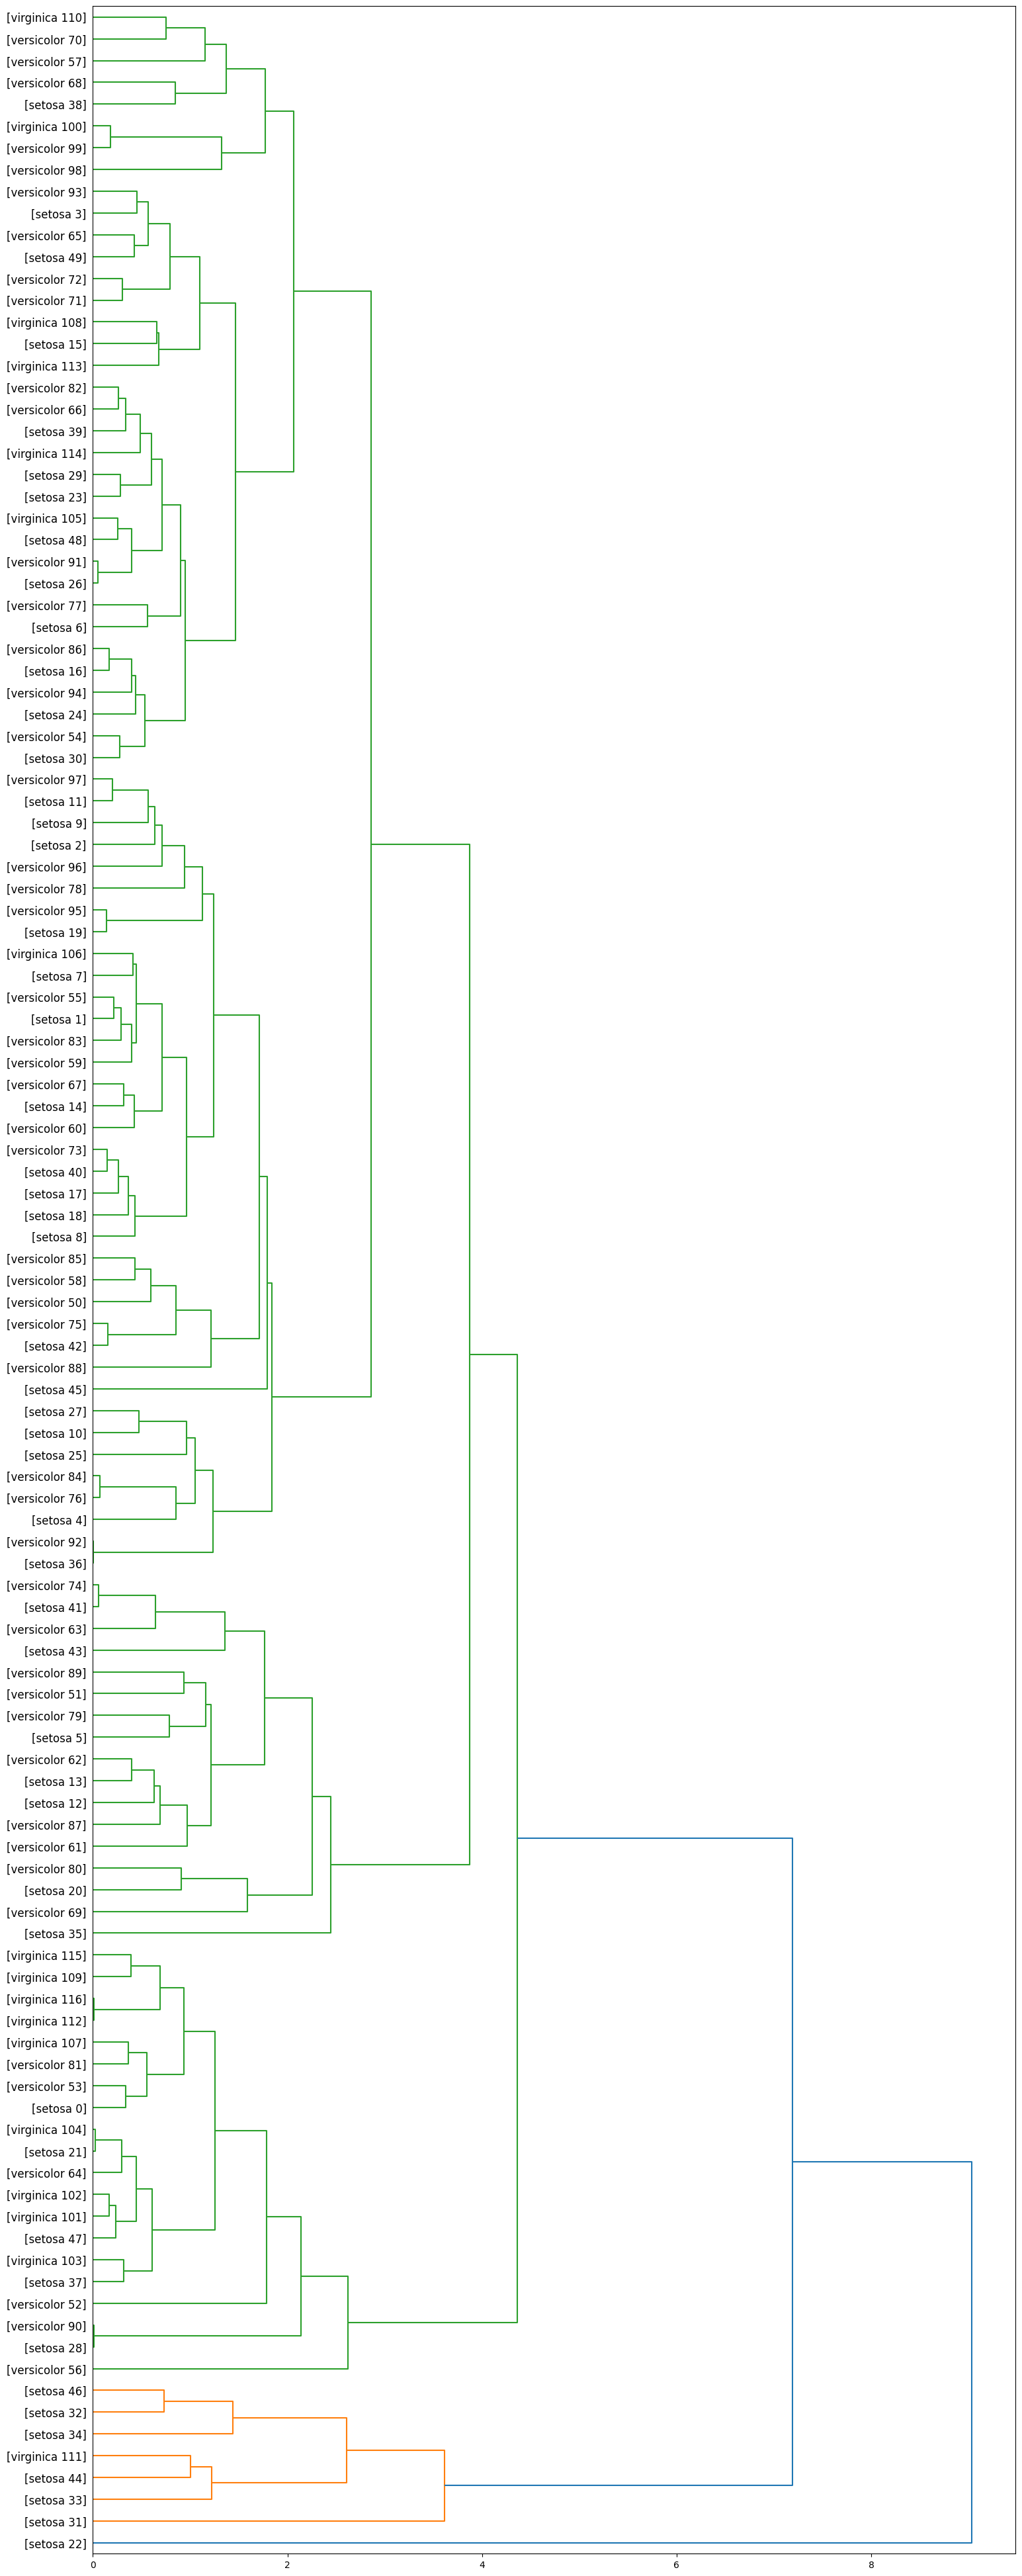

In [59]:
fig = plt.figure(figsize=(18, 50))
def llf(id):
    return '[%s %s]' % (pdf['species'][id], id)  # Label: species dan indeks

dendro = hierarchy.dendrogram(Z, leaf_label_func=llf, leaf_rotation=0, leaf_font_size=12, orientation='right')
plt.show()

**Penjelasan Clustering with Scipy pada tiap Linkage:**

**Single Linkage:** Pada metode ini, jarak antar kluster dihitung berdasarkan jarak minimum antara dua titik yang berada di dua kluster yang berbeda. Dengan menggunakan kriteria distance (jarak), hasil klustering menunjukkan bahwa sebagian besar data dikelompokkan dalam satu kluster besar (kluster 1), sementara kluster-kluster lainnya memiliki sangat sedikit anggota. Ini mencerminkan karakteristik dari single linkage yang cenderung menghasilkan kluster yang sangat panjang dan berantai, karena hanya satu titik yang perlu memiliki kedekatan jarak untuk memasukkan data lainnya ke dalam kluster yang sama. Ketika menggunakan kriteria maxclust dengan 5 kluster, distribusi data lebih merata, tetapi masih ada kluster yang didominasi oleh banyak anggota.

**Complete Linkage:** Dalam metode ini, jarak antar kluster diukur berdasarkan jarak maksimum antara titik yang ada di dua kluster yang berbeda. Ini mengarah pada kluster yang lebih kompak karena metode ini cenderung untuk mengelompokkan data yang memiliki jarak yang lebih seragam dan memisahkan kluster lebih jauh jika terdapat perbedaan jarak yang besar antar anggota kluster. Hasil klustering menunjukkan pembagian data yang lebih tersebar dengan beberapa kluster yang lebih kecil dan lebih terpisah, mencerminkan kecenderungan complete linkage untuk menciptakan kluster yang lebih seimbang dalam ukuran.

**Average Linkage:** Metode ini mengukur jarak antar kluster berdasarkan rata-rata jarak antara semua pasangan titik di dua kluster yang berbeda. Hasil klustering dengan average linkage menghasilkan distribusi yang lebih bervariasi antara kluster, dengan sebagian besar data terbagi ke dalam kluster yang lebih besar, namun ada beberapa kluster yang lebih kecil. Pendekatan ini memberikan keseimbangan antara single dan complete linkage, dengan kluster yang tidak terlalu tersebar namun juga tidak terlalu berantai.


***Clustering With Scikit-Learn***

*a. Single Linkage*

In [60]:
feature_mtx = pdf[features].values
agglom_single = AgglomerativeClustering(n_clusters = 6, linkage = 'single')
agglom_single.fit(feature_mtx)
agglom_single.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 5,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [61]:
pdf['cluster_single'] = agglom_single.labels_
pdf.head()

sepal_length  sepal_width  petal_length  petal_width species  \
0      0.222222     0.625000      0.067797     0.041667  setosa   
1      0.166667     0.416667      0.067797     0.041667  setosa   
2      0.111111     0.500000      0.050847     0.041667  setosa   
3      0.083333     0.458333      0.084746     0.041667  setosa   
4      0.194444     0.666667      0.067797     0.041667  setosa   

   cluster_single  
0               2  
1               2  
2               2  
3               2  
4               2

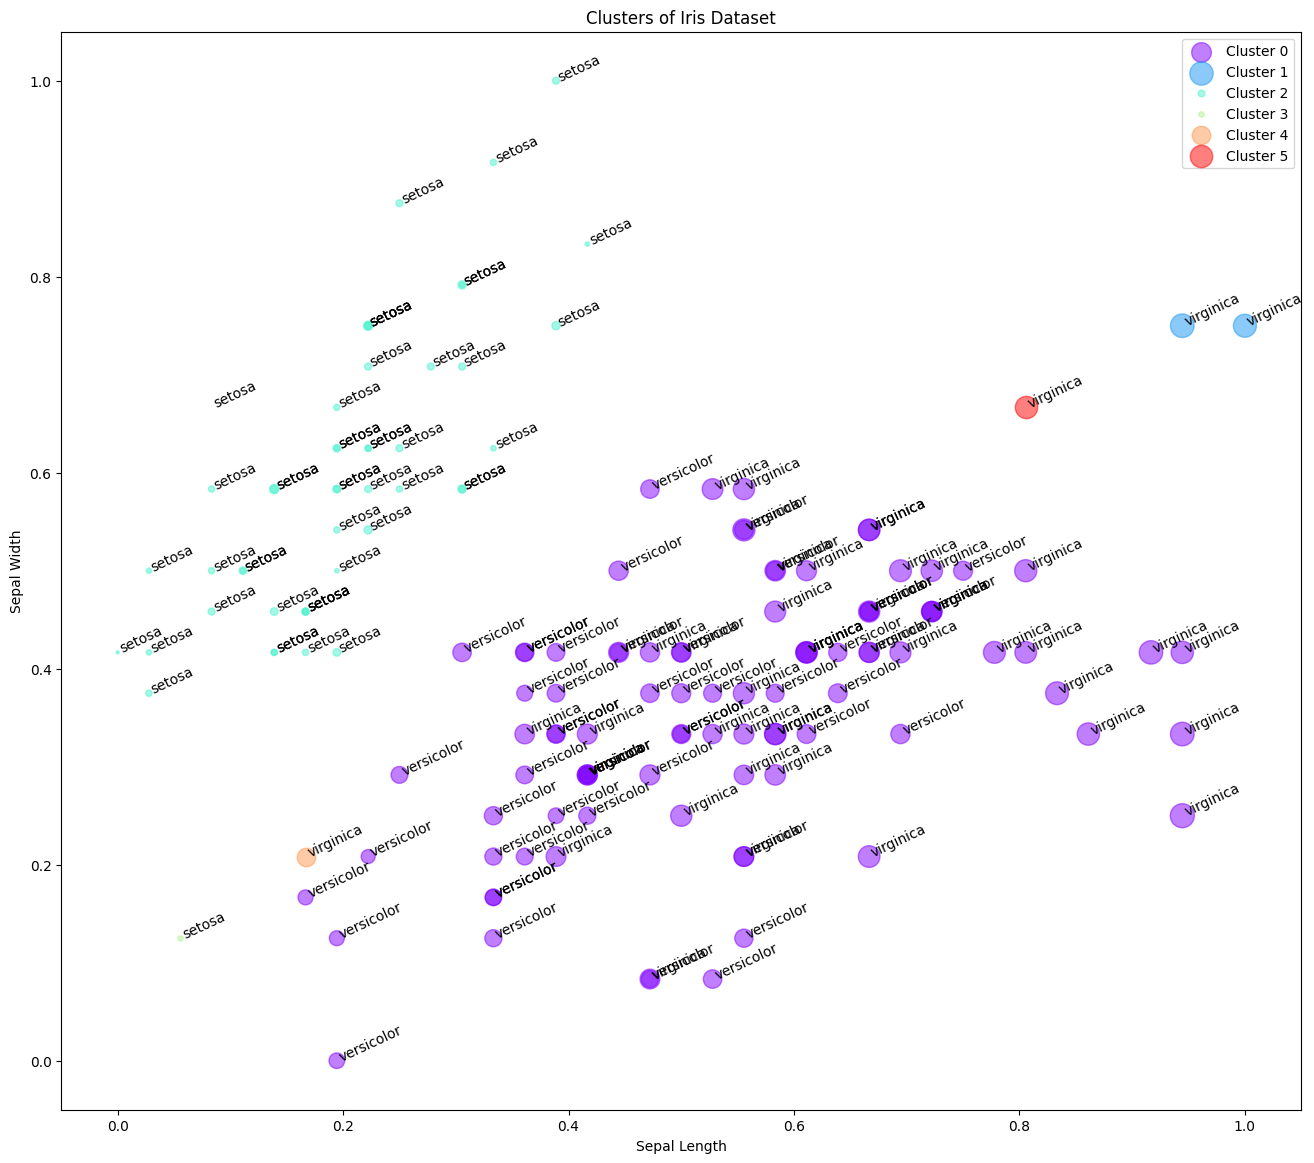

In [62]:
import matplotlib.cm as cm

n_clusters = max(pdf['cluster_single']) + 1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(n_clusters))

plt.figure(figsize=(16, 14))

for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf['cluster_single'] == label]
    for i in subset.index:
        plt.text(
            subset.sepal_length[i],
            subset.sepal_width[i],
            subset['species'][i],  # Tampilkan nama spesies
            rotation=25
        )
    plt.scatter(
        subset.sepal_length,
        subset.sepal_width,
        s=subset.petal_length * 300,  # Ukuran titik berdasarkan petal_length
        c=[color],
        label='Cluster ' + str(label),
        alpha=0.5
    )

plt.legend()
plt.title('Clusters of Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

*Menghitung jumlah kasus di setiap kelompok*

In [63]:
pdf.groupby(['cluster_single','species'])['cluster_single'].count()

cluster_single  species   
0               versicolor    50
                virginica     46
1               virginica      2
2               setosa        49
3               setosa         1
4               virginica      1
5               virginica      1
Name: cluster_single, dtype: int64

*Melihat masing-masing cluster*

In [64]:
agg_iris = pdf.groupby(['cluster_single','species'])[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].mean()
agg_iris


sepal_length  sepal_width  petal_length  \
cluster_single species                                               
0              versicolor      0.454444     0.320833      0.552542   
               virginica       0.627415     0.389493      0.766028   
1              virginica       0.972222     0.750000      0.940678   
2              setosa          0.198980     0.600340      0.079211   
3              setosa          0.055556     0.125000      0.050847   
4              virginica       0.166667     0.208333      0.593220   
5              virginica       0.805556     0.666667      0.864407   

                           petal_width  
cluster_single species                  
0              versicolor     0.510833  
               virginica      0.799819  
1              virginica      0.833333  
2              setosa         0.059524  
3              setosa         0.083333  
4              virginica      0.666667  
5              virginica      1.000000

*Plotting Dendogram*

*b. Complete Linkage*

In [65]:
agglom_complete = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom_complete.fit(feature_mtx)
agglom_complete.labels_

array([2, 3, 3, 3, 2, 2, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3, 2,
       2, 3, 2, 3, 2, 2, 0, 0, 0, 4, 0, 4, 0, 4, 0, 4, 4, 0, 4, 0, 4, 0,
       4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 5, 0, 4, 4, 4, 4, 0, 4, 0, 0, 4,
       4, 4, 4, 0, 4, 4, 4, 4, 4, 0, 4, 4, 5, 0, 5, 5, 5, 1, 4, 1, 0, 1,
       5, 0, 5, 0, 0, 5, 5, 1, 1, 4, 5, 0, 1, 0, 5, 1, 0, 0, 5, 1, 1, 1,
       5, 0, 0, 1, 5, 5, 0, 5, 5, 5, 0, 5, 5, 5, 0, 5, 5, 0])

In [66]:
pdf['cluster_complete'] = agglom_complete.labels_
pdf.head()

sepal_length  sepal_width  petal_length  petal_width species  \
0      0.222222     0.625000      0.067797     0.041667  setosa   
1      0.166667     0.416667      0.067797     0.041667  setosa   
2      0.111111     0.500000      0.050847     0.041667  setosa   
3      0.083333     0.458333      0.084746     0.041667  setosa   
4      0.194444     0.666667      0.067797     0.041667  setosa   

   cluster_single  cluster_complete  
0               2                 2  
1               2                 3  
2               2                 3  
3               2                 3  
4               2                 2

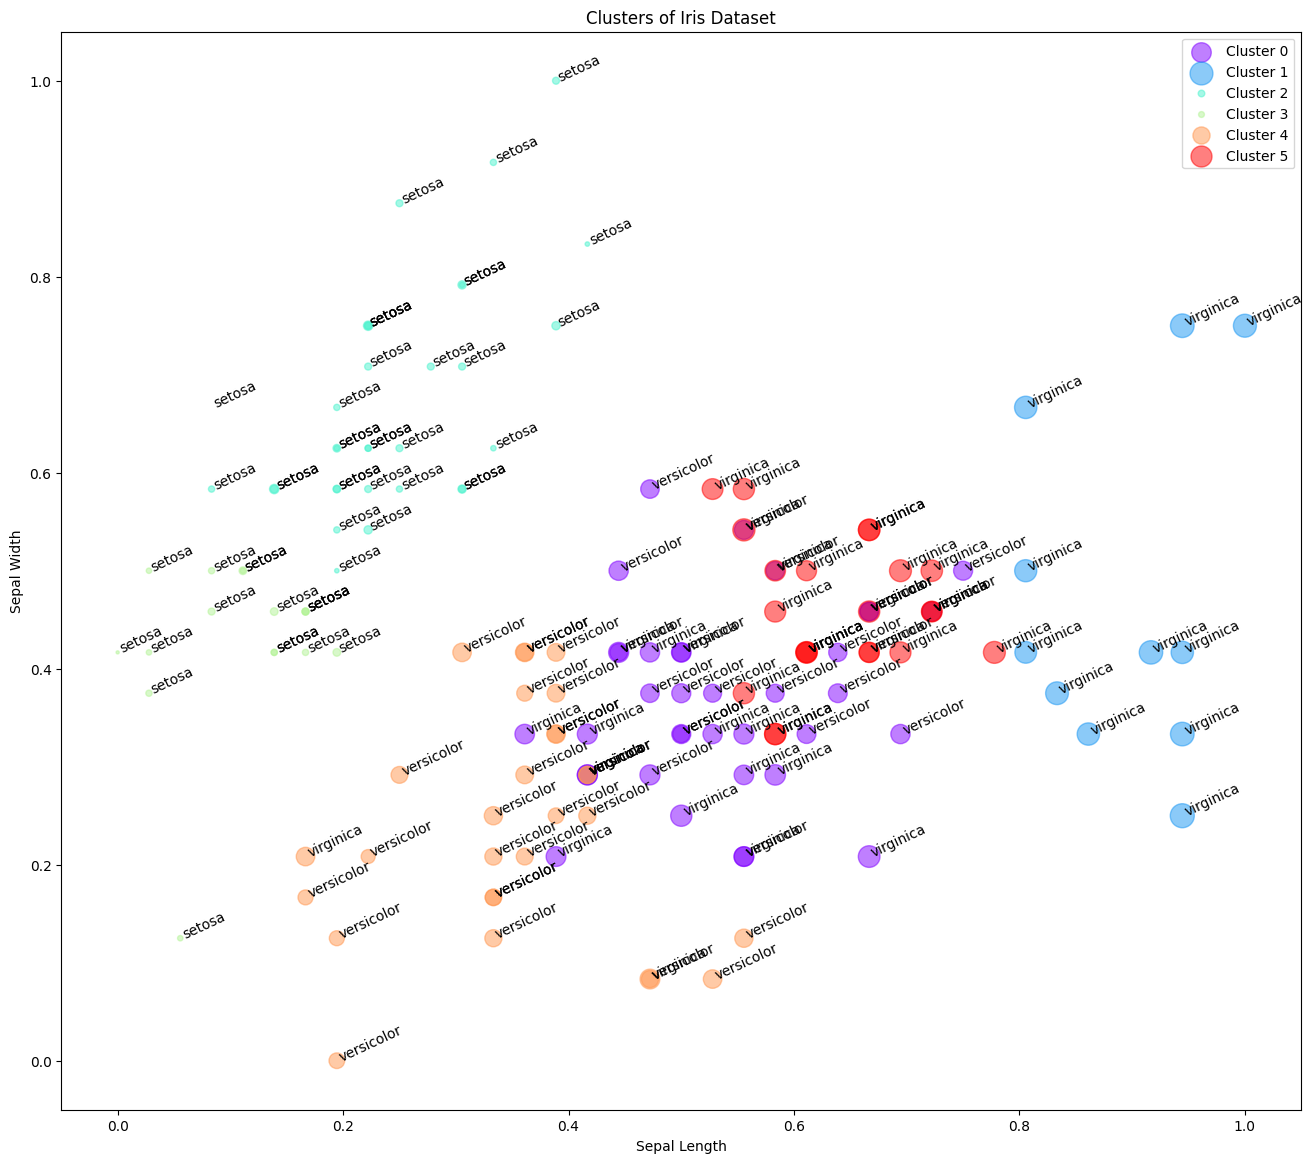

In [67]:
n_clusters = max(pdf['cluster_complete']) + 1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(n_clusters))

plt.figure(figsize=(16, 14))

for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf['cluster_complete'] == label]
    for i in subset.index:
        plt.text(
            subset.sepal_length[i],
            subset.sepal_width[i],
            subset['species'][i],  # Tampilkan nama spesies
            rotation=25
        )
    plt.scatter(
        subset.sepal_length,
        subset.sepal_width,
        s=subset.petal_length * 300,  # Ukuran titik berdasarkan petal_length
        c=[color],
        label='Cluster ' + str(label),
        alpha=0.5
    )

plt.legend()
plt.title('Clusters of Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

*Menghitung jumlah kasus di setiap kelompok*

In [68]:
pdf.groupby(['cluster_complete','species'])['cluster_complete'].count()

cluster_complete  species   
0                 versicolor    22
                  virginica     15
1                 virginica     11
2                 setosa        33
3                 setosa        17
4                 versicolor    27
                  virginica      2
5                 versicolor     1
                  virginica     22
Name: cluster_complete, dtype: int64

*Melihat masing-masing cluster*

In [69]:
agg_iris = pdf.groupby(['cluster_complete','species'])[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].mean()
agg_iris


sepal_length  sepal_width  petal_length  \
cluster_complete species                                               
0                versicolor      0.568182     0.407197      0.607858   
                 virginica       0.490741     0.308333      0.694915   
1                virginica       0.891414     0.473485      0.904468   
2                setosa          0.242424     0.674242      0.082691   
3                setosa          0.106209     0.428922      0.070788   
4                versicolor      0.353909     0.246914      0.502825   
                 virginica       0.319444     0.145833      0.635593   
5                versicolor      0.666667     0.416667      0.677966   
                 virginica       0.635101     0.462121      0.769646   

                             petal_width  
cluster_complete species                  
0                versicolor     0.562500  
                 virginica      0.727778  
1                virginica      0.810606  
2                setosa         0.073232  
3                setosa         0.034314  
4                versicolor     0.462963  
                 virginica      0.625000  
5                versicolor     0.666667  
                 virginica      0.865530

*Plotting Dendogram*

*c. Average Linkage*

In [70]:
agglom_average = AgglomerativeClustering(n_clusters = 6, linkage = 'average')
agglom_average.fit(feature_mtx)
agglom_average.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 2, 4, 1, 4, 1, 1, 1, 1, 2, 1, 4, 5,
       1, 4, 1, 4, 4, 1, 1, 5, 1, 4, 1, 4, 1, 4, 1, 1, 4, 4, 1, 1, 1, 5,
       1, 4, 4, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 4])

In [71]:
pdf['cluster_average'] = agglom_average.labels_
pdf.head()

sepal_length  sepal_width  petal_length  petal_width species  \
0      0.222222     0.625000      0.067797     0.041667  setosa   
1      0.166667     0.416667      0.067797     0.041667  setosa   
2      0.111111     0.500000      0.050847     0.041667  setosa   
3      0.083333     0.458333      0.084746     0.041667  setosa   
4      0.194444     0.666667      0.067797     0.041667  setosa   

   cluster_single  cluster_complete  cluster_average  
0               2                 2                0  
1               2                 3                0  
2               2                 3                0  
3               2                 3                0  
4               2                 2                0

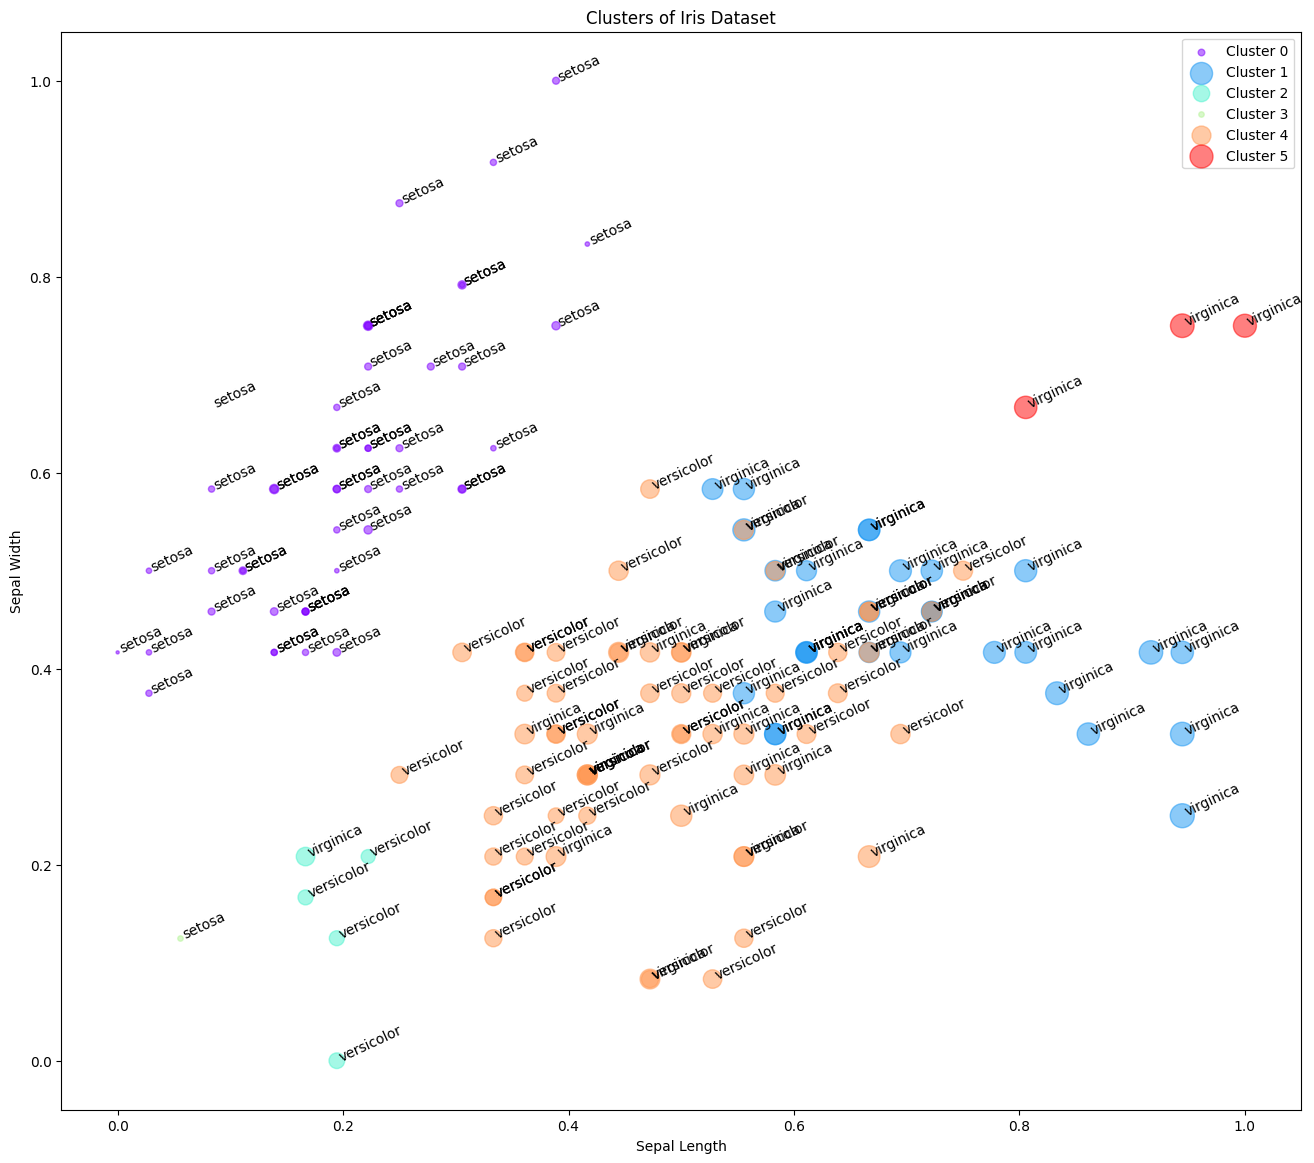

In [72]:
n_clusters = max(pdf['cluster_average']) + 1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(n_clusters))

plt.figure(figsize=(16, 14))

for color, label in zip(colors, cluster_labels):
    subset = pdf[pdf['cluster_average'] == label]
    for i in subset.index:
        plt.text(
            subset.sepal_length[i],
            subset.sepal_width[i],
            subset['species'][i],  # Tampilkan nama spesies
            rotation=25
        )
    plt.scatter(
        subset.sepal_length,
        subset.sepal_width,
        s=subset.petal_length * 300,  # Ukuran titik berdasarkan petal_length
        c=[color],
        label='Cluster ' + str(label),
        alpha=0.5
    )

plt.legend()
plt.title('Clusters of Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

*Menghitung jumlah kasus di setiap kelompok*

In [73]:
pdf.groupby(['cluster_average','species'])['cluster_average'].count()

cluster_average  species   
0                setosa        49
1                virginica     30
2                versicolor     4
                 virginica      1
3                setosa         1
4                versicolor    46
                 virginica     16
5                virginica      3
Name: cluster_average, dtype: int64

*Melihat masing-masing cluster*

In [74]:
agg_iris = pdf.groupby(['cluster_average','species'])[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].mean()
agg_iris


sepal_length  sepal_width  petal_length  \
cluster_average species                                               
0               setosa          0.198980     0.600340      0.079211   
1               virginica       0.700926     0.440278      0.804520   
2               versicolor      0.194444     0.125000      0.385593   
                virginica       0.166667     0.208333      0.593220   
3               setosa          0.055556     0.125000      0.050847   
4               versicolor      0.477053     0.337862      0.567060   
                virginica       0.489583     0.294271      0.693856   
5               virginica       0.916667     0.722222      0.915254   

                            petal_width  
cluster_average species                  
0               setosa         0.059524  
1               virginica      0.843056  
2               versicolor     0.385417  
                virginica      0.666667  
3               setosa         0.083333  
4               versicolor     0.521739  
                virginica      0.718750  
5               virginica      0.888889

*Plotting Dendogram*

<ipython-input-75-4b73915e4655>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
<ipython-input-75-4b73915e4655>:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))


Text(0, 0.5, 'mpg')

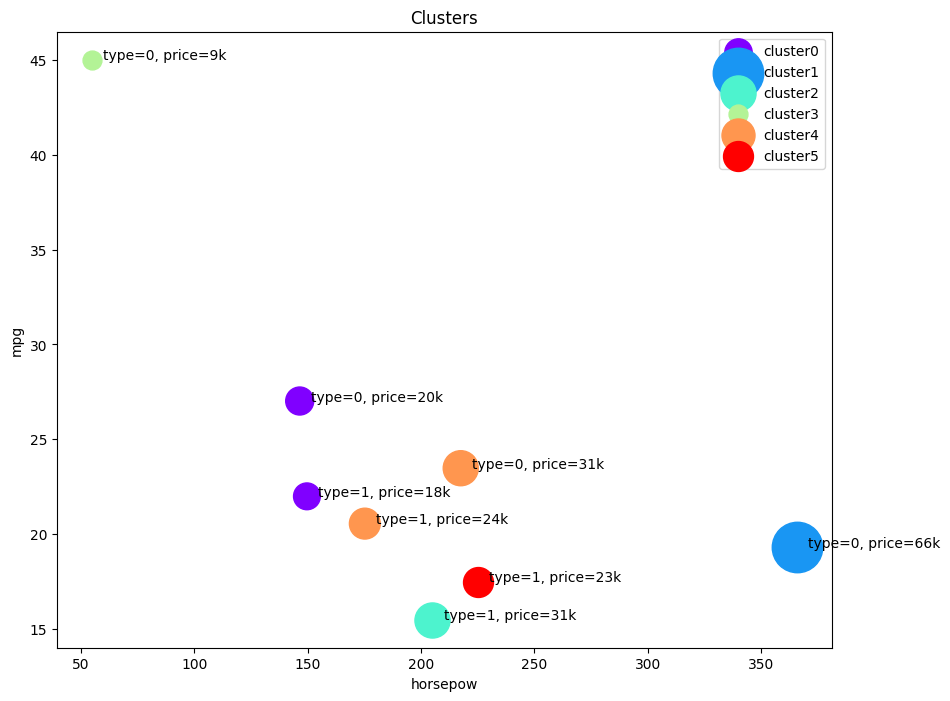

In [75]:
plt.figure(figsize=(10, 8))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')


**Penjelasan Clustering with Scikit-Learn untuk tiap Linkage:**

1. Pada penerapan **Single Linkage** dengan *AgglomerativeClustering* pada dataset Iris, model mengelompokkan data berdasarkan kedekatan terdekat antar titik dalam hierarki. Hasil clustering menunjukkan bahwa sebagian besar data *setosa* terkelompok dalam kluster 2, sedangkan *versicolor* mayoritas terkelompok dalam kluster 0, dan *virginica* tersebar di beberapa kluster, termasuk 0, 1, 4, dan 5. Hasil analisis lebih lanjut menunjukkan bahwa kluster 0 sebagian besar berisi *versicolor*, kluster 2 hampir seluruhnya diisi oleh *setosa*, dan kluster 1, 4, dan 5 berisi sebagian besar *virginica*. Agregasi rata-rata fitur pada setiap kluster mengungkapkan perbedaan mencolok dalam karakteristik morfologi antar spesies, seperti panjang sepal yang lebih kecil pada *setosa* dibandingkan dengan *versicolor* dan *virginica*. **Single Linkage** cenderung menggabungkan data yang sangat mirip atau memiliki kedekatan minimum dalam satu kluster, namun ini dapat menghasilkan kluster yang sangat besar atau kecil tergantung pada bagaimana data terhubung, yang membuat metode ini sensitif terhadap outlier.

2. Pada penerapan **Complete Linkage** dengan *AgglomerativeClustering*, model mengelompokkan data dengan mengutamakan kedekatan terjauh antara titik dalam satu kluster. Dalam hasil kluster, kita dapat melihat bahwa *setosa* terdistribusi dalam kluster 2 dan 3, dengan sebagian besar berada di kluster 2. *Versicolor* terbagi antara kluster 0, 4, dan 5, sementara *virginica* tersebar dalam kluster 1, 4, dan 5. Pengelompokan ini mencerminkan pemisahan yang lebih ketat antara spesies, dengan kluster-kluster lebih homogen dalam komposisinya. Agregasi rata-rata fitur menunjukkan perbedaan morfologi yang lebih jelas, seperti *setosa* yang memiliki ukuran sepal dan petal lebih kecil dibandingkan dengan *versicolor* dan *virginica*. Selain itu, kluster 0 dan 4, yang berisi *versicolor* dan *virginica*, menunjukkan perbedaan ukuran pada sepal dan petal yang lebih jelas daripada kluster lainnya, mencerminkan pemisahan yang lebih tajam antar spesies. Pendekatan **Complete Linkage** ini menghasilkan kluster yang lebih terpisah secara eksplisit, karena mengukur jarak terjauh dalam setiap kluster, yang cenderung menghindari pencampuran antara kelompok yang tidak serupa.

3. Pada penerapan **Average Linkage** dengan *AgglomerativeClustering*, model ini mengelompokkan data berdasarkan rata-rata jarak antar titik dalam setiap kluster. Dalam hasil kluster, terlihat bahwa sebagian besar data *setosa* tergabung dalam kluster 0, sementara *versicolor* dan *virginica* tersebar lebih merata di kluster-kluster lainnya. Pendekatan **Average Linkage** cenderung menghasilkan kluster yang lebih "rata" atau seimbang, karena jarak antar titik dihitung berdasarkan rata-rata jarak antara semua pasangan titik dalam dua kluster yang berbeda. Dengan demikian, kluster yang dihasilkan lebih mengutamakan keseimbangan antara kedekatan antar titik dalam satu kluster dan titik yang ada di kluster lainnya. Dari hasil agregasi, kita dapat melihat bahwa kluster 0, yang sebagian besar terdiri dari *setosa*, memiliki ukuran yang relatif lebih kecil dibandingkan kluster lainnya, mencerminkan bahwa **Average Linkage** lebih memadankan data dengan ukuran yang serupa dalam satu kluster. Pemisahan yang lebih seimbang ini juga mempengaruhi bagaimana spesies seperti *versicolor* dan *virginica* tersebar dalam kluster yang berbeda, tanpa adanya dominasi satu spesies di kluster tertentu, seperti yang terlihat pada **Complete Linkage**.


***Perbedaan antara clustering menggunakan Scipy dan Scikit-learn pada dataset Iris***

Pada dataset Iris, metode clustering menggunakan **Single Linkage** dengan baik di Scipy maupun Scikit-learn menghasilkan kluster yang cenderung sangat besar karena menggabungkan data berdasarkan kedekatan titik yang sangat kecil. Hal ini menyebabkan sebagian besar data *setosa* terkelompok dalam satu kluster dominan (kluster 2) dan kluster lainnya memiliki sangat sedikit anggota. Metode ini rentan terhadap outlier karena hanya memerlukan satu titik yang sangat dekat untuk memasukkan data lainnya ke dalam kluster yang sama.

Pada **Complete Linkage**, yang mengutamakan jarak maksimum antar titik, kluster yang dihasilkan lebih terpisah. Hasil clustering menunjukkan bahwa *setosa* lebih banyak terdistribusi dalam kluster 2 dan 3, dengan sebagian besar di kluster 2. *Versicolor* dan *virginica* tersebar di beberapa kluster, dengan pembagian data yang lebih jelas dan pemisahan antar spesies yang lebih tajam. Metode ini menghindari pencampuran antar kelompok yang tidak serupa dan menghasilkan kluster yang lebih homogen dalam komposisinya.

Sedangkan pada **Average Linkage**, yang menghitung jarak antar kluster berdasarkan rata-rata jarak antar titik, kluster yang dihasilkan lebih seimbang. Ini tercermin pada distribusi data di mana sebagian besar data *setosa* tergabung dalam kluster 0, sementara *versicolor* dan *virginica* tersebar lebih merata. Pendekatan ini menciptakan kluster yang lebih kompak namun tetap memiliki keseimbangan antar kedekatan titik dalam satu kluster dan antar kluster yang berbeda.

Secara umum, **Scikit-learn** memberikan kemudahan dalam pengaturan jumlah kluster dan integrasi dengan algoritma lain, sedangkan **Scipy** memberikan kontrol yang lebih besar pada pemrosesan jarak antar titik, memungkinkan penyesuaian lebih mendalam pada proses clustering.